In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook")
import math
import datetime
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
! pip install eli5
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
cookiecutter 1.7.2 requires Jinja2<3.0.0, but you have jinja2 3.1.2 which is incompatible.
cookiecutter 1.7.2 requires MarkupSafe<2.0.0, but you have markupsafe 2.1.1 which is incompatible.



  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached MarkupSafe-2.1.1-cp39-cp39-win_amd64.whl (17 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [2]:
table = pd.ExcelFile('/Users/arakh/Downloads/four.xlsx')
cols = ['date','stock market name', 'bid', 'ask', 'bid-Ask spread', 'avg price',
        'opening price', 'min price', 'max price', 'last price',
        'avg weight price', 'market price','pension market price', 'admitted quote',
        'closing price', 'ind price', 'ind price type', 'turnover', 'quantity', 'volume',
        'coupon', 'maturity date', 'ind price return', 'bid price return', 'ask price return',
        'last price return', 'closing price return', 'accum coupon income', 'duration',
        'modified duration', 'offer date', 'offer ind price return', 'offer bid price return', 'offer ask price return',
        'offer last price return', 'offer closing price return', 'offer duration', 'modified offer duraton',
        'g-spread', 'g-spread2', 'g-spread benchmark']

In [3]:
df1 = pd.read_excel(table, 'Gov_AD_5.5', names = cols).iloc[8:,:].set_index('date')
df2 = pd.read_excel(table, 'Gov_OFZ_5.7', names = cols).iloc[8:,:].set_index('date') #Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)
df3 = pd.read_excel(table, 'Gov_OFZ_5.3', names = cols).iloc[8:,:].set_index('date') #Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)
df4 = pd.read_excel(table, 'Gov_OFZ_6.0', names = cols).iloc[8:,:].set_index('date') #Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)
df5 = pd.read_excel(table, 'Gov_AD_10.0', names = cols).iloc[8:,:].set_index('date') #Россия, 46011 (ОФЗ-АД, SU46011RMFS1)
df6 = pd.read_excel(table, 'Gov_OFZ-PK_9.17', names = cols).iloc[8:,:].set_index('date') #Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)

df7 = pd.read_excel(table, 'Cor_Tink_8.25', names = cols).iloc[8:,:].set_index('date') #Тинькофф Банк, 001P-03R
df8 = pd.read_excel(table, 'Cor_Sber_8.80', names = cols).iloc[8:,:].set_index('date') #Сбербанк России, 002P-01
df9 = pd.read_excel(table, 'Cor_MKB_8.35', names = cols).iloc[8:,:].set_index('date') #Московский кредитный банк, 001Р-03
#IFX index
df10 = pd.read_excel(table, 'Cor_AFK_9.90', names = cols).iloc[8:,:].set_index('date') 
df11 = pd.read_excel(table, 'Cor_Bash_5.50', names = cols).iloc[8:,:].set_index('date')
df12 = pd.read_excel(table, 'Cor_Evr_8.40', names = cols).iloc[8:,:].set_index('date')
df13 = pd.read_excel(table, 'Cor_VEB_8.15', names = cols).iloc[8:,:].set_index('date')
df14 = pd.read_excel(table, 'Cor_VEB_5.95', names = cols).iloc[8:,:].set_index('date')
df15 = pd.read_excel(table, 'Cor_GTLK_9.85', names = cols).iloc[8:,:].set_index('date')
df16 = pd.read_excel(table, 'Cor_Gaz_8.15', names = cols).iloc[8:,:].set_index('date')
df17 = pd.read_excel(table, 'Cor_Sam_9.15', names = cols).iloc[8:,:].set_index('date')
df18 = pd.read_excel(table, 'Cor_MTS_6.85', names = cols).iloc[8:,:].set_index('date')
df19 = pd.read_excel(table, 'Cor_Magnit_6.20', names = cols).iloc[8:,:].set_index('date')
df20 = pd.read_excel(table, 'Cor_Met_6.55', names = cols).iloc[8:,:].set_index('date')
df21 = pd.read_excel(table, 'Cor_Pik_8.20', names = cols).iloc[8:,:].set_index('date')
df22 = pd.read_excel(table, 'Cor_RZD_7.35', names = cols).iloc[8:,:].set_index('date')
df23 = pd.read_excel(table, 'Cor_RZD_6.85', names = cols).iloc[8:,:].set_index('date')
df24 = pd.read_excel(table, 'Cor_RZD_7.85', names = cols).iloc[8:,:].set_index('date')
df25 = pd.read_excel(table, 'Cor_Neft_8.65', names = cols).iloc[8:,:].set_index('date')
df26 = pd.read_excel(table, 'Cor_Neft_7.50', names = cols).iloc[8:,:].set_index('date')
df27 = pd.read_excel(table, 'Cor_Neft_7.90', names = cols).iloc[8:,:].set_index('date')
df28 = pd.read_excel(table, 'Cor_Rost_6.65', names = cols).iloc[8:,:].set_index('date')
df29 = pd.read_excel(table, 'Cor_Sber_7.20', names = cols).iloc[8:,:].set_index('date')
df30 = pd.read_excel(table, 'Cor_Sber_7.70', names = cols).iloc[8:,:].set_index('date')
df31 = pd.read_excel(table, 'Cor_Sber_6.30', names = cols).iloc[8:,:].set_index('date')
df32 = pd.read_excel(table, 'Cor_Sber_5.65', names = cols).iloc[8:,:].set_index('date')
df33 = pd.read_excel(table, 'Cor_Sber_5.70', names = cols).iloc[8:,:].set_index('date')
df34 = pd.read_excel(table, 'Cor_Sber_5.25', names = cols).iloc[8:,:].set_index('date')
df35 = pd.read_excel(table, 'Cor_Sber_7.30', names = cols).iloc[8:,:].set_index('date')
df36 = pd.read_excel(table, 'Cor_Seg_7.10', names = cols).iloc[8:,:].set_index('date')
df37 = pd.read_excel(table, 'Cor_Trans_7.30', names = cols).iloc[8:,:].set_index('date')

df38 = pd.read_excel(table, 'Mun_Lip_5.75', names = cols).iloc[8:,:].set_index('date')
df39 = pd.read_excel(table, 'Mun_Bel_5.70', names = cols).iloc[8:,:].set_index('date')
df40 = pd.read_excel(table, 'Mun_XMAO_7.60', names = cols).iloc[8:,:].set_index('date')
df41 = pd.read_excel(table, 'Mun_Bash_5.90', names = cols).iloc[8:,:].set_index('date')
df42 = pd.read_excel(table, 'Mun_Bash_7.65', names = cols).iloc[8:,:].set_index('date')
df43 = pd.read_excel(table, 'Mun_Jar_7.95', names = cols).iloc[8:,:].set_index('date')
df44 = pd.read_excel(table, 'Gov_OFZ_4.50', names = cols).iloc[8:,:].set_index('date')
df45 = pd.read_excel(table, 'Gov_OFZ_7.15', names = cols).iloc[8:,:].set_index('date')
df46 = pd.read_excel(table, 'Gov_OFZ_7.65', names = cols).iloc[8:,:].set_index('date')
df47 = pd.read_excel(table, 'Gov_OFZ_7.40', names = cols).iloc[8:,:].set_index('date')
df48 = pd.read_excel(table, 'Gov_OFZ_5.90', names = cols).iloc[8:,:].set_index('date')

df49 = pd.read_excel(table, 'Cor_Bash_7.70', names = cols).iloc[8:,:].set_index('date')
df50 = pd.read_excel(table, 'Cor_Gid_0.10', names = cols).iloc[8:,:].set_index('date')
df51 = pd.read_excel(table, 'Cor_RZD_6.75', names = cols).iloc[8:,:].set_index('date')

df52 = pd.read_excel(table, 'Mun_Msk_6.00', names = cols).iloc[8:,:].set_index('date')
df53 = pd.read_excel(table, 'Gov_OFZ_8.15', names = cols).iloc[8:,:].set_index('date')
df54 = pd.read_excel(table, 'Gov_OFZ_7.05', names = cols).iloc[8:,:].set_index('date')
df55 = pd.read_excel(table, 'Gov_OFZ_7.00', names = cols).iloc[8:,:].set_index('date')
df56 = pd.read_excel(table, 'Gov_OF_7.00', names = cols).iloc[8:,:].set_index('date')

df57 = pd.read_excel(table, 'Cor_Dev_13.85', names = cols).iloc[8:,:].set_index('date')
df58 = pd.read_excel(table, 'Cor_Alpha_11.75', names = cols).iloc[8:,:].set_index('date')
#df59 = pd.read_excel(table, 'Cor_VTB_10.00', names = cols).iloc[8:,:].set_index('date')
#df60 = pd.read_excel(table, 'Cor_Vert_8.80', names = cols).iloc[8:,:].set_index('date')
#df61 = pd.read_excel(table, 'Cor_Gazcap_8.45', names = cols).iloc[8:,:].set_index('date')
df62 = pd.read_excel(table, 'Cor_TD_14.00', names = cols).iloc[8:,:].set_index('date')
df63 = pd.read_excel(table, 'Cor_EBIS_13.00', names = cols).iloc[8:,:].set_index('date')
df64 = pd.read_excel(table, 'Cor_Pob_9.75', names = cols).iloc[8:,:].set_index('date')
df65 = pd.read_excel(table, 'Cor_Leven_13.00', names = cols).iloc[8:,:].set_index('date')
df66 = pd.read_excel(table, 'Cor_Fin_7.50', names = cols).iloc[8:,:].set_index('date')
df67 = pd.read_excel(table, 'Cor_Sin_8.10', names = cols).iloc[8:,:].set_index('date')
df68 = pd.read_excel(table, 'Cor_Sel_8.50', names = cols).iloc[8:,:].set_index('date')
df69 = pd.read_excel(table, 'Cor_Det_7.00', names = cols).iloc[8:,:].set_index('date')
df70 = pd.read_excel(table, 'Cor_RUSAL_6.50', names = cols).iloc[8:,:].set_index('date')
df71 = pd.read_excel(table, 'Cor_pioner_9.75', names = cols).iloc[8:,:].set_index('date')
df72 = pd.read_excel(table, 'Cor_RNKB_6.80', names = cols).iloc[8:,:].set_index('date')
df73 = pd.read_excel(table, 'Cor_YATEK_9.15', names = cols).iloc[8:,:].set_index('date')
df74 = pd.read_excel(table, 'Cor_Leg_11.00', names = cols).iloc[8:,:].set_index('date')
df75 = pd.read_excel(table, 'Cor_Gar_12.00', names = cols).iloc[8:,:].set_index('date')
df76 = pd.read_excel(table, 'Cor_Gar_11.50', names = cols).iloc[8:,:].set_index('date')
df77 = pd.read_excel(table, 'Cor_Zavod_14.00', names = cols).iloc[8:,:].set_index('date')
df78 = pd.read_excel(table, 'Cor_pioner_10.50', names = cols).iloc[8:,:].set_index('date')
df79 = pd.read_excel(table, 'Cor_Leg_13.50', names = cols).iloc[8:,:].set_index('date')
df80 = pd.read_excel(table, 'Cor_Red_11.00', names = cols).iloc[8:,:].set_index('date')
df81 = pd.read_excel(table, 'Cor_PR_10.00', names = cols).iloc[8:,:].set_index('date')

df82 = pd.read_excel(table, 'Mun_Orel_8.30', names = cols).iloc[8:,:].set_index('date')
df83 = pd.read_excel(table, 'Mun_MO_7.05', names = cols).iloc[8:,:].set_index('date')
df84 = pd.read_excel(table, 'Mun_MO_7.50', names = cols).iloc[8:,:].set_index('date')
df85 = pd.read_excel(table, 'Mun_MO_6.55', names = cols).iloc[8:,:].set_index('date')
df86 = pd.read_excel(table, 'Mun_MO_5.75', names = cols).iloc[8:,:].set_index('date')
df87 = pd.read_excel(table, 'Mun_MO_9.65', names = cols).iloc[8:,:].set_index('date')
df88 = pd.read_excel(table, 'Mun_MSK_6.55', names = cols).iloc[8:,:].set_index('date')
df89 = pd.read_excel(table, 'Mun_MO_5.95', names = cols).iloc[8:,:].set_index('date')
df90 = pd.read_excel(table, 'Mun_Kar_8.00', names = cols).iloc[8:,:].set_index('date')
df91 = pd.read_excel(table, 'Mun_Oren_14.00', names = cols).iloc[8:,:].set_index('date')
df92 = pd.read_excel(table, 'Mun_Sv_5.80', names = cols).iloc[8:,:].set_index('date')
df93 = pd.read_excel(table, 'Mun_Sar_8.10', names = cols).iloc[8:,:].set_index('date')

df94 = pd.read_excel(table, 'Mun_Sv_5.70', names = cols).iloc[8:,:].set_index('date')
df95 = pd.read_excel(table, 'Mun_Sv_9.80', names = cols).iloc[8:,:].set_index('date')
df96 = pd.read_excel(table, 'Mun_Vol_8.40', names = cols).iloc[8:,:].set_index('date')
df97 = pd.read_excel(table, 'Mun_Nig_9.25', names = cols).iloc[8:,:].set_index('date')
df98 = pd.read_excel(table, 'Mun_Kras_6.95', names = cols).iloc[8:,:].set_index('date')
df99 = pd.read_excel(table, 'Mun_Tom_6.70', names = cols).iloc[8:,:].set_index('date')
df100 = pd.read_excel(table, 'Mun_Jak_8.59', names = cols).iloc[8:,:].set_index('date')
df101 = pd.read_excel(table, 'Mun_Hab_9.00', names = cols).iloc[8:,:].set_index('date')

#index CBI
df102 = pd.read_excel(table, 'Cor_ABZ_12.00', names = cols).iloc[8:,:].set_index('date')
df103 = pd.read_excel(table, 'Cor_AFK_6.90', names = cols).iloc[8:,:].set_index('date')
df104 = pd.read_excel(table, 'Cor_AFK_11.30', names = cols).iloc[8:,:].set_index('date')
df105 = pd.read_excel(table, 'Cor_AFK_9.40', names = cols).iloc[8:,:].set_index('date')
df106 = pd.read_excel(table, 'Cor_AFK_8.40', names = cols).iloc[8:,:].set_index('date')
df107 = pd.read_excel(table, 'Cor_Alpha_6.20', names = cols).iloc[8:,:].set_index('date')
df108 = pd.read_excel(table, 'Cor_Aero_8.35', names = cols).iloc[8:,:].set_index('date')
df109 = pd.read_excel(table, 'Cor_VTB_8.60', names = cols).iloc[8:,:].set_index('date')
df110 = pd.read_excel(table, 'Cor_VTB2_8.60', names = cols).iloc[8:,:].set_index('date')
df111 = pd.read_excel(table, 'Cor_Bel_7.40', names = cols).iloc[8:,:].set_index('date')
df112 = pd.read_excel(table, 'Cor_Borz_7.60', names = cols).iloc[8:,:].set_index('date')
df113 = pd.read_excel(table, 'Cor_Brus_11.00', names = cols).iloc[8:,:].set_index('date')
df114 = pd.read_excel(table, 'Cor_Brus_9.60', names = cols).iloc[8:,:].set_index('date')
df115 = pd.read_excel(table, 'Cor_Brus_11.85', names = cols).iloc[8:,:].set_index('date')
df116 = pd.read_excel(table, 'Cor_GTLK_11.00', names = cols).iloc[8:,:].set_index('date')
df117 = pd.read_excel(table, 'Cor_GTLK_7.69', names = cols).iloc[8:,:].set_index('date')
df118 = pd.read_excel(table, 'Cor_Gazcap_8.90', names = cols).iloc[8:,:].set_index('date')
df119 = pd.read_excel(table, 'Cor_Gaz_9.15', names = cols).iloc[8:,:].set_index('date')
df120 = pd.read_excel(table, 'Cor_Gaz_7.40', names = cols).iloc[8:,:].set_index('date')
df121 = pd.read_excel(table, 'Cor_Gaz_5.85', names = cols).iloc[8:,:].set_index('date')
df122 = pd.read_excel(table, 'Cor_Gaz_10.45', names = cols).iloc[8:,:].set_index('date')
df123 = pd.read_excel(table, 'Cor_LSR_8.50', names = cols).iloc[8:,:].set_index('date')
df124 = pd.read_excel(table, 'Cor_Cher_7.50', names = cols).iloc[8:,:].set_index('date')
df125 = pd.read_excel(table, 'Cor_Sam_11.00', names = cols).iloc[8:,:].set_index('date')
df126 = pd.read_excel(table, 'Cor_Sam_9.05', names = cols).iloc[8:,:].set_index('date')
df127 = pd.read_excel(table, 'Cor_Sam_12.70', names = cols).iloc[8:,:].set_index('date')
df128 = pd.read_excel(table, 'Cor_G_10.60', names = cols).iloc[8:,:].set_index('date')
df129 = pd.read_excel(table, 'Cor_Domod_8.10', names = cols).iloc[8:,:].set_index('date')
df130 = pd.read_excel(table, 'Cor_Kiwi_8.40', names = cols).iloc[8:,:].set_index('date')
df131 = pd.read_excel(table, 'Cor_MV_7.30', names = cols).iloc[8:,:].set_index('date')
df132 = pd.read_excel(table, 'Cor_MTS_6.45', names = cols).iloc[8:,:].set_index('date')
df133 = pd.read_excel(table, 'Cor_MTSB_7.45', names = cols).iloc[8:,:].set_index('date')
df134 = pd.read_excel(table, 'Cor_Maks_10.75', names = cols).iloc[8:,:].set_index('date')
df135 = pd.read_excel(table, 'Cor_Okay_7.85', names = cols).iloc[8:,:].set_index('date')
df136 = pd.read_excel(table, 'Cor_PIK_8.25', names = cols).iloc[8:,:].set_index('date')
df137 = pd.read_excel(table, 'Cor_PIK_7.40', names = cols).iloc[8:,:].set_index('date')
df138 = pd.read_excel(table, 'Cor_RESO_9.00', names = cols).iloc[8:,:].set_index('date')
df139 = pd.read_excel(table, 'Cor_Akva_9.50', names = cols).iloc[8:,:].set_index('date')
df140 = pd.read_excel(table, 'Cor_Sber_7.50', names = cols).iloc[8:,:].set_index('date')
df141 = pd.read_excel(table, 'Cor_Sber_5.55', names = cols).iloc[8:,:].set_index('date')
df142 = pd.read_excel(table, 'Cor_Sber_6.90', names = cols).iloc[8:,:].set_index('date')
df143 = pd.read_excel(table, 'Cor_Sber_6.65', names = cols).iloc[8:,:].set_index('date')
df144 = pd.read_excel(table, 'Cor_Seg_9.85', names = cols).iloc[8:,:].set_index('date')
df145 = pd.read_excel(table, 'Cor_Seg_10.90', names = cols).iloc[8:,:].set_index('date')
df146 = pd.read_excel(table, 'Cor_Soft_8.90', names = cols).iloc[8:,:].set_index('date')
df147 = pd.read_excel(table, 'Cor_Ural_6.85', names = cols).iloc[8:,:].set_index('date')
df148 = pd.read_excel(table, 'Cor_Novo_8.75', names = cols).iloc[8:,:].set_index('date')
#df149 = pd.read_excel(table, 'Cor_Centr_9.50', names = cols).iloc[8:,:].set_index('date')
df150 = pd.read_excel(table, 'Cor_YATEK_8.50', names = cols).iloc[8:,:].set_index('date')

df151 = pd.read_excel(table, 'Gov_OFZ_8.50', names = cols).iloc[8:,:].set_index('date')

#Cbonds-CBI
df152 = pd.read_excel(table, 'Cor_Alr_5.75', names = cols).iloc[8:,:].set_index('date')
df153 = pd.read_excel(table, 'Cor_Alr2_5.75', names = cols).iloc[8:,:].set_index('date')
df154 = pd.read_excel(table, 'Cor_Alr3_5.75', names = cols).iloc[8:,:].set_index('date')
df155 = pd.read_excel(table, 'Cor_Alr4_5.75', names = cols).iloc[8:,:].set_index('date')
df156 = pd.read_excel(table, 'Cor_Alr5_5.75', names = cols).iloc[8:,:].set_index('date')
df157 = pd.read_excel(table, 'Cor_Avt_7.95', names = cols).iloc[8:,:].set_index('date')
df158 = pd.read_excel(table, 'Cor_Avt_6.75', names = cols).iloc[8:,:].set_index('date')
df159 = pd.read_excel(table, 'Cor_Alpha_5.90', names = cols).iloc[8:,:].set_index('date')
df160 = pd.read_excel(table, 'Cor_Alpha_5.95', names = cols).iloc[8:,:].set_index('date')
df161 = pd.read_excel(table, 'Cor_Alpha_7.00', names = cols).iloc[8:,:].set_index('date')
df162 = pd.read_excel(table, 'Cor_Alpha_7.15', names = cols).iloc[8:,:].set_index('date')
df163 = pd.read_excel(table, 'Cor_Alpha_7.90', names = cols).iloc[8:,:].set_index('date')
#df164 = pd.read_excel(table, 'Cor_Alpha_9.55', names = cols).iloc[8:,:].set_index('date')
df164 = pd.read_excel(table, 'Cor_Alpha2_5.90', names = cols).iloc[8:,:].set_index('date')
df165 = pd.read_excel(table, 'Cor_Alpha_5.70', names = cols).iloc[8:,:].set_index('date')
df166 = pd.read_excel(table, 'Cor_Alpha_7.75', names = cols).iloc[8:,:].set_index('date')
df167 = pd.read_excel(table, 'Cor_Alpha_6.15', names = cols).iloc[8:,:].set_index('date')
df168 = pd.read_excel(table, 'Cor_Atom_7.50', names = cols).iloc[8:,:].set_index('date')
df169 = pd.read_excel(table, 'Cor_VTB_7.50', names = cols).iloc[8:,:].set_index('date')
df170 = pd.read_excel(table, 'Cor_VTB_7.60', names = cols).iloc[8:,:].set_index('date')
#df172 = pd.read_excel(table, 'Cor_VEBL_7.91', names = cols).iloc[8:,:].set_index('date')
df171 = pd.read_excel(table, 'Cor_VEB_7.67', names = cols).iloc[8:,:].set_index('date')
df172 = pd.read_excel(table, 'Cor_VEB_7.48', names = cols).iloc[8:,:].set_index('date')
df173 = pd.read_excel(table, 'Cor_VEB_7.27', names = cols).iloc[8:,:].set_index('date')
df174 = pd.read_excel(table, 'Cor_VEB_6.59', names = cols).iloc[8:,:].set_index('date')
df175 = pd.read_excel(table, 'Cor_VEB_5.74', names = cols).iloc[8:,:].set_index('date')
df176 = pd.read_excel(table, 'Cor_VEB_8.13', names = cols).iloc[8:,:].set_index('date')
df177 = pd.read_excel(table, 'Cor_VEB_7.97', names = cols).iloc[8:,:].set_index('date')
#df180 = pd.read_excel(table, 'Cor_Vost_9.55', names = cols).iloc[8:,:].set_index('date')
df178 = pd.read_excel(table, 'Cor_Nor_7.20', names = cols).iloc[8:,:].set_index('date')
#df182 = pd.read_excel(table, 'Cor_GSP_6.85', names = cols).iloc[8:,:].set_index('date')
df179 = pd.read_excel(table, 'Cor_Gazcap_7.80', names = cols).iloc[8:,:].set_index('date')
df180 = pd.read_excel(table, 'Cor_Gazcap_5.70', names = cols).iloc[8:,:].set_index('date')
df181 = pd.read_excel(table, 'Cor_Gazcap_5.90', names = cols).iloc[8:,:].set_index('date')
df182 = pd.read_excel(table, 'Cor_Gazcap_7.15', names = cols).iloc[8:,:].set_index('date')
df183 = pd.read_excel(table, 'Cor_Gazcap_7.152', names = cols).iloc[8:,:].set_index('date')
df184 = pd.read_excel(table, 'Cor_Gazcap_7.153', names = cols).iloc[8:,:].set_index('date')
df185 = pd.read_excel(table, 'Cor_Gazcap_7.154', names = cols).iloc[8:,:].set_index('date')
df186 = pd.read_excel(table, 'Cor_Gazneft_7.70', names = cols).iloc[8:,:].set_index('date')
df187 = pd.read_excel(table, 'Cor_Gazneft_7.20', names = cols).iloc[8:,:].set_index('date')
df188 = pd.read_excel(table, 'Cor_Gazneft_6.85', names = cols).iloc[8:,:].set_index('date')
df189 = pd.read_excel(table, 'Cor_Gazneft_7.15', names = cols).iloc[8:,:].set_index('date')
df190 = pd.read_excel(table, 'Cor_Gazneft_6.20', names = cols).iloc[8:,:].set_index('date')
df191 = pd.read_excel(table, 'Cor_Gazneft_7.75', names = cols).iloc[8:,:].set_index('date')
df192 = pd.read_excel(table, 'Cor_Gaz_8.10', names = cols).iloc[8:,:].set_index('date')
df193 = pd.read_excel(table, 'Cor_Gaz_8.102', names = cols).iloc[8:,:].set_index('date')
df194 = pd.read_excel(table, 'Cor_Gazbank_8.20', names = cols).iloc[8:,:].set_index('date')
#df195 = pd.read_excel(table, 'Cor_Gazbank_7.40', names = cols).iloc[8:,:].set_index('date')
df195 = pd.read_excel(table, 'Cor_Gazbank_6.90', names = cols).iloc[8:,:].set_index('date')
#df197 = pd.read_excel(table, 'Cor_Gazbank_5.85', names = cols).iloc[8:,:].set_index('date')
df196 = pd.read_excel(table, 'Cor_Gazbank_5.95', names = cols).iloc[8:,:].set_index('date')
df197 = pd.read_excel(table, 'Cor_Gazbank_5.90', names = cols).iloc[8:,:].set_index('date')
df198 = pd.read_excel(table, 'Cor_Gazbank_9.30', names = cols).iloc[8:,:].set_index('date')
df199 = pd.read_excel(table, 'Cor_Gazbank_8.10', names = cols).iloc[8:,:].set_index('date')
df200 = pd.read_excel(table, 'Cor_Gazbank_6.65', names = cols).iloc[8:,:].set_index('date')
df201 = pd.read_excel(table, 'Cor_Gazbank_5.65', names = cols).iloc[8:,:].set_index('date')
df202 = pd.read_excel(table, 'Cor_Gazbank_6.10', names = cols).iloc[8:,:].set_index('date')
#df205 = pd.read_excel(table, 'Cor_Gazbank_8.15', names = cols).iloc[8:,:].set_index('date')
df203 = pd.read_excel(table, 'Cor_EHF_7.95', names = cols).iloc[8:,:].set_index('date')
df204 = pd.read_excel(table, 'Cor_Evrohim_7.85', names = cols).iloc[8:,:].set_index('date')
df205 = pd.read_excel(table, 'Cor_Evrohim_7.852', names = cols).iloc[8:,:].set_index('date')

df206 = pd.read_excel(table, 'Cor_Evrohim_8.05', names = cols).iloc[8:,:].set_index('date')

df207 = pd.read_excel(table, 'Cor_ZSD_10.44', names = cols).iloc[8:,:].set_index('date')
df208 = pd.read_excel(table, 'Cor_Iks_5.65', names = cols).iloc[8:,:].set_index('date')
df209 = pd.read_excel(table, 'Cor_Iks_7.60', names = cols).iloc[8:,:].set_index('date')
df210 = pd.read_excel(table, 'Cor_MBES_6.20', names = cols).iloc[8:,:].set_index('date')
df211 = pd.read_excel(table, 'Cor_MOEK_5.80', names = cols).iloc[8:,:].set_index('date')
df212 = pd.read_excel(table, 'Cor_MTS_7.25', names = cols).iloc[8:,:].set_index('date')
df213 = pd.read_excel(table, 'Cor_MTS_8.70', names = cols).iloc[8:,:].set_index('date')
df214 = pd.read_excel(table, 'Cor_MTS_8.60', names = cols).iloc[8:,:].set_index('date')
df215 = pd.read_excel(table, 'Cor_MTS_8.00', names = cols).iloc[8:,:].set_index('date')
#df219 = pd.read_excel(table, 'Cor_MTS_6.852', names = cols).iloc[8:,:].set_index('date')
df216 = pd.read_excel(table, 'Cor_MTS_6.60', names = cols).iloc[8:,:].set_index('date')
df217 = pd.read_excel(table, 'Cor_MTS_6.602', names = cols).iloc[8:,:].set_index('date')
df218 = pd.read_excel(table, 'Cor_MTS_6.50', names = cols).iloc[8:,:].set_index('date')
df219 = pd.read_excel(table, 'Cor_MTS_11.75', names = cols).iloc[8:,:].set_index('date')
df220 = pd.read_excel(table, 'Cor_MTS_6.25', names = cols).iloc[8:,:].set_index('date')
df221 = pd.read_excel(table, 'Cor_Magnit_7.05', names = cols).iloc[8:,:].set_index('date')
df222 = pd.read_excel(table, 'Cor_Magnit_7.052', names = cols).iloc[8:,:].set_index('date')
df223 = pd.read_excel(table, 'Cor_Megafon_8.90', names = cols).iloc[8:,:].set_index('date')
df224 = pd.read_excel(table, 'Cor_Metall_7.15', names = cols).iloc[8:,:].set_index('date')
df225 = pd.read_excel(table, 'Cor_Metall_5.70', names = cols).iloc[8:,:].set_index('date')
df226 = pd.read_excel(table, 'Cor_Mail_7.90', names = cols).iloc[8:,:].set_index('date')
df227 = pd.read_excel(table, 'Cor_NPK_8.80', names = cols).iloc[8:,:].set_index('date')
df228 = pd.read_excel(table, 'Cor_OGK_5.75', names = cols).iloc[8:,:].set_index('date')
df229 = pd.read_excel(table, 'Cor_Polus_7.40', names = cols).iloc[8:,:].set_index('date')
df230 = pd.read_excel(table, 'Cor_Pochta_7.05', names = cols).iloc[8:,:].set_index('date')
df231 = pd.read_excel(table, 'Cor_Pochta_5.90', names = cols).iloc[8:,:].set_index('date')
df232 = pd.read_excel(table, 'Cor_Pochta_11.50', names = cols).iloc[8:,:].set_index('date')
df233 = pd.read_excel(table, 'Cor_Pochta_7.50', names = cols).iloc[8:,:].set_index('date')
df234 = pd.read_excel(table, 'Cor_Prom_8.15', names = cols).iloc[8:,:].set_index('date')
df235 = pd.read_excel(table, 'Cor_Prom_6.10', names = cols).iloc[8:,:].set_index('date')
df236 = pd.read_excel(table, 'Cor_Prom_6.40', names = cols).iloc[8:,:].set_index('date')
df237 = pd.read_excel(table, 'Cor_Prom_7.60', names = cols).iloc[8:,:].set_index('date')
df238 = pd.read_excel(table, 'Cor_RZD_8.50', names = cols).iloc[8:,:].set_index('date')
df239 = pd.read_excel(table, 'Cor_RZD_8.40', names = cols).iloc[8:,:].set_index('date')
df240 = pd.read_excel(table, 'Cor_RZD_8.25', names = cols).iloc[8:,:].set_index('date')
df241 = pd.read_excel(table, 'Cor_RZD_7.30', names = cols).iloc[8:,:].set_index('date')
df242 = pd.read_excel(table, 'Cor_RZD_7.302', names = cols).iloc[8:,:].set_index('date')
df243 = pd.read_excel(table, 'Cor_RZD_8.70', names = cols).iloc[8:,:].set_index('date')
df244 = pd.read_excel(table, 'Cor_RZD_9.10', names = cols).iloc[8:,:].set_index('date')
df245 = pd.read_excel(table, 'Cor_RZD_9.102', names = cols).iloc[8:,:].set_index('date')
df246 = pd.read_excel(table, 'Cor_RZD_7.90', names = cols).iloc[8:,:].set_index('date')
df247 = pd.read_excel(table, 'Cor_RZD_6.752', names = cols).iloc[8:,:].set_index('date')
#df252 = pd.read_excel(table, 'Cor_RZD_7.352', names = cols).iloc[8:,:].set_index('date')
#df253 = pd.read_excel(table, 'Cor_RZD_6.852', names = cols).iloc[8:,:].set_index('date')
df248 = pd.read_excel(table, 'Cor_RZD_7.852', names = cols).iloc[8:,:].set_index('date')
#df255 = pd.read_excel(table, 'Cor_RZD_7.853', names = cols).iloc[8:,:].set_index('date')
df249 = pd.read_excel(table, 'Cor_RZD_6.80', names = cols).iloc[8:,:].set_index('date')
df250 = pd.read_excel(table, 'Cor_RZD_7.75', names = cols).iloc[8:,:].set_index('date')
df251 = pd.read_excel(table, 'Cor_RZD_9.85', names = cols).iloc[8:,:].set_index('date')
df252 = pd.read_excel(table, 'Cor_RN_7.85', names = cols).iloc[8:,:].set_index('date')
df253 = pd.read_excel(table, 'Cor_RN_6.25', names = cols).iloc[8:,:].set_index('date')
df254 = pd.read_excel(table, 'Cor_RN_7.40', names = cols).iloc[8:,:].set_index('date')
df255 = pd.read_excel(table, 'Cor_Rosbank_7.60', names = cols).iloc[8:,:].set_index('date')
df256 = pd.read_excel(table, 'Cor_Rosneft_7.30', names = cols).iloc[8:,:].set_index('date')
df257 = pd.read_excel(table, 'Cor_Rosneft_8.70', names = cols).iloc[8:,:].set_index('date')
df258 = pd.read_excel(table, 'Cor_Rosneft_7.95', names = cols).iloc[8:,:].set_index('date')
df259 = pd.read_excel(table, 'Cor_Rosneft_7.10', names = cols).iloc[8:,:].set_index('date')
df260 = pd.read_excel(table, 'Cor_Rosneft_5.80', names = cols).iloc[8:,:].set_index('date')
df261 = pd.read_excel(table, 'Cor_Rosneft_9.40', names = cols).iloc[8:,:].set_index('date')
df262 = pd.read_excel(table, 'Cor_Rosneft_9.402', names = cols).iloc[8:,:].set_index('date')
df263 = pd.read_excel(table, 'Cor_Rossel_5.50', names = cols).iloc[8:,:].set_index('date')
df264 = pd.read_excel(table, 'Cor_Rossel_8.95', names = cols).iloc[8:,:].set_index('date')
df265 = pd.read_excel(table, 'Cor_Rossel_7.60', names = cols).iloc[8:,:].set_index('date')
df266 = pd.read_excel(table, 'Cor_Rossel_7.80', names = cols).iloc[8:,:].set_index('date')
df267 = pd.read_excel(table, 'Cor_Rossel_5.25', names = cols).iloc[8:,:].set_index('date')
df268 = pd.read_excel(table, 'Cor_Rossel_5.40', names = cols).iloc[8:,:].set_index('date')
df269 = pd.read_excel(table, 'Cor_Rossel_7.00', names = cols).iloc[8:,:].set_index('date')
df270 = pd.read_excel(table, 'Cor_Rosset_5.55', names = cols).iloc[8:,:].set_index('date')
df271 = pd.read_excel(table, 'Cor_Rost_7.30', names = cols).iloc[8:,:].set_index('date')
df272 = pd.read_excel(table, 'Cor_Rost_7.15', names = cols).iloc[8:,:].set_index('date')
df273 = pd.read_excel(table, 'Cor_Rost_6.85', names = cols).iloc[8:,:].set_index('date')
df274 = pd.read_excel(table, 'Cor_Rost_7.70', names = cols).iloc[8:,:].set_index('date')
df275 = pd.read_excel(table, 'Cor_Rost_7.50', names = cols).iloc[8:,:].set_index('date')
df276 = pd.read_excel(table, 'Cor_Sibur_7.65', names = cols).iloc[8:,:].set_index('date')
df277 = pd.read_excel(table, 'Cor_SOPF_8.00', names = cols).iloc[8:,:].set_index('date')
df278 = pd.read_excel(table, 'Cor_SOPF_9.05', names = cols).iloc[8:,:].set_index('date')
df279 = pd.read_excel(table, 'Cor_Sber_7.45', names = cols).iloc[8:,:].set_index('date')
df280 = pd.read_excel(table, 'Cor_Sber_7.40', names = cols).iloc[8:,:].set_index('date')
df281 = pd.read_excel(table, 'Cor_Sber_7.43', names = cols).iloc[8:,:].set_index('date')
df282 = pd.read_excel(table, 'Cor_Sber_0.00', names = cols).iloc[8:,:].set_index('date')
df283 = pd.read_excel(table, 'Cor_Sever_8.65', names = cols).iloc[8:,:].set_index('date')
df284 = pd.read_excel(table, 'Cor_Slav_6.10', names = cols).iloc[8:,:].set_index('date')
df285 = pd.read_excel(table, 'Cor_Sovcom_8.10', names = cols).iloc[8:,:].set_index('date')
df286 = pd.read_excel(table, 'Cor_Toyota_5.90', names = cols).iloc[8:,:].set_index('date')
df287 = pd.read_excel(table, 'Cor_Toyota_11.15', names = cols).iloc[8:,:].set_index('date')
df288 = pd.read_excel(table, 'Cor_Trans_6.95', names = cols).iloc[8:,:].set_index('date')
df289 = pd.read_excel(table, 'Cor_Trans_8.05', names = cols).iloc[8:,:].set_index('date')
df290 = pd.read_excel(table, 'Cor_Transneft_9.45', names = cols).iloc[8:,:].set_index('date')
df291 = pd.read_excel(table, 'Cor_Transneft_9.25', names = cols).iloc[8:,:].set_index('date')
df292 = pd.read_excel(table, 'Cor_Transneft_7.90', names = cols).iloc[8:,:].set_index('date')
df293 = pd.read_excel(table, 'Cor_Transneft_6.85', names = cols).iloc[8:,:].set_index('date')
df294 = pd.read_excel(table, 'Cor_FPK_7.20', names = cols).iloc[8:,:].set_index('date')
df295 = pd.read_excel(table, 'Cor_FPK_6.90', names = cols).iloc[8:,:].set_index('date')
df296 = pd.read_excel(table, 'Cor_FSK_8.70', names = cols).iloc[8:,:].set_index('date')
df297 = pd.read_excel(table, 'Cor_FSK_6.75', names = cols).iloc[8:,:].set_index('date')
df298 = pd.read_excel(table, 'Cor_FSK_7.60', names = cols).iloc[8:,:].set_index('date')
df299 = pd.read_excel(table, 'Cor_HH_6.45', names = cols).iloc[8:,:].set_index('date')
df300 = pd.read_excel(table, 'Cor_Bash_10.90', names = cols).iloc[8:,:].set_index('date')

df301 = pd.read_excel(table, 'Cor_VTB_10.002', names = cols).iloc[8:,:].set_index('date')
df302 = pd.read_excel(table, 'Cor_VTB_23.75', names = cols).iloc[8:,:].set_index('date')
df303 = pd.read_excel(table, 'Cor_VTB_17.75', names = cols).iloc[8:,:].set_index('date')
df304 = pd.read_excel(table, 'Cor_VTB_10.003', names = cols).iloc[8:,:].set_index('date')
df305 = pd.read_excel(table, 'Cor_VTB_17.752', names = cols).iloc[8:,:].set_index('date')
df306 = pd.read_excel(table, 'Cor_VTB_7.602', names = cols).iloc[8:,:].set_index('date')
df307 = pd.read_excel(table, 'Cor_VTB_22.20', names = cols).iloc[8:,:].set_index('date')
df308 = pd.read_excel(table, 'Cor_VTB_8.40', names = cols).iloc[8:,:].set_index('date')

df309 = pd.read_excel(table, 'Cor_ABZ_12.75', names = cols).iloc[8:,:].set_index('date')
df310 = pd.read_excel(table, 'Cor_Avtodom_12.25', names = cols).iloc[8:,:].set_index('date')
df311 = pd.read_excel(table, 'Cor_Atom_9.50', names = cols).iloc[8:,:].set_index('date')
df312 = pd.read_excel(table, 'Cor_Biz_10.45', names = cols).iloc[8:,:].set_index('date')
df313 = pd.read_excel(table, 'Cor_Vita_10.00', names = cols).iloc[8:,:].set_index('date')
df314 = pd.read_excel(table, 'Cor_GK_13.00', names = cols).iloc[8:,:].set_index('date')
df315 = pd.read_excel(table, 'Cor_Inter_9.90', names = cols).iloc[8:,:].set_index('date')
df316 = pd.read_excel(table, 'Cor_Ren_8.45', names = cols).iloc[8:,:].set_index('date')
df317 = pd.read_excel(table, 'Cor_Ren_8.15', names = cols).iloc[8:,:].set_index('date')
df318 = pd.read_excel(table, 'Cor_Kir_9.50', names = cols).iloc[8:,:].set_index('date')
df319 = pd.read_excel(table, 'Cor_Gar_10.50', names = cols).iloc[8:,:].set_index('date')
df320 = pd.read_excel(table, 'Cor_Leg_9.95', names = cols).iloc[8:,:].set_index('date')
df321 = pd.read_excel(table, 'Cor_Maks_9.75', names = cols).iloc[8:,:].set_index('date')
df322 = pd.read_excel(table, 'Cor_Most_0.01', names = cols).iloc[8:,:].set_index('date')
df323 = pd.read_excel(table, 'Cor_PKB_13.00', names = cols).iloc[8:,:].set_index('date')
df324 = pd.read_excel(table, 'Cor_PKB_10.75', names = cols).iloc[8:,:].set_index('date')
df325 = pd.read_excel(table, 'Cor_PKB_12.25', names = cols).iloc[8:,:].set_index('date')
df326 = pd.read_excel(table, 'Cor_UOMZ_7.40', names = cols).iloc[8:,:].set_index('date')
df327 = pd.read_excel(table, 'Cor_SlavEko_11.00', names = cols).iloc[8:,:].set_index('date')
df328 = pd.read_excel(table, 'Cor_Talan_13.00', names = cols).iloc[8:,:].set_index('date')
df329 = pd.read_excel(table, 'Cor_TFN_12.00', names = cols).iloc[8:,:].set_index('date')
df330 = pd.read_excel(table, 'Cor_Tami_10.50', names = cols).iloc[8:,:].set_index('date')
df331 = pd.read_excel(table, 'Cor_Trans_9.80', names = cols).iloc[8:,:].set_index('date')
df332 = pd.read_excel(table, 'Cor_Trans_8.50', names = cols).iloc[8:,:].set_index('date')
df333 = pd.read_excel(table, 'Cor_HKF_8.00', names = cols).iloc[8:,:].set_index('date')
df334 = pd.read_excel(table, 'Cor_HKF_6.85', names = cols).iloc[8:,:].set_index('date')
df335 = pd.read_excel(table, 'Cor_CPPK_9.50', names = cols).iloc[8:,:].set_index('date')
df336 = pd.read_excel(table, 'Cor_RTel_9.50', names = cols).iloc[8:,:].set_index('date')
df337 = pd.read_excel(table, 'Cor_Rtel_8.40', names = cols).iloc[8:,:].set_index('date')

df338 = pd.read_excel(table, 'Cor_AFK_6.35', names = cols).iloc[8:,:].set_index('date')
df339 = pd.read_excel(table, 'Cor_AFK_7.35', names = cols).iloc[8:,:].set_index('date')
df340 = pd.read_excel(table, 'Cor_Otkr_6.25', names = cols).iloc[8:,:].set_index('date')
df341 = pd.read_excel(table, 'Cor_GTLK_9.57', names = cols).iloc[8:,:].set_index('date')
df342 = pd.read_excel(table, 'Cor_Evroplan_7.10', names = cols).iloc[8:,:].set_index('date')
df343 = pd.read_excel(table, 'Cor_RUSAL_16.00', names = cols).iloc[8:,:].set_index('date')

df344 = pd.read_excel(table, 'Cor_AO_13.00', names = cols).iloc[8:,:].set_index('date')
df345 = pd.read_excel(table, 'Cor_APRI_13.00', names = cols).iloc[8:,:].set_index('date')
df346 = pd.read_excel(table, 'Cor_Solt_13.00', names = cols).iloc[8:,:].set_index('date')
df347 = pd.read_excel(table, 'Cor_Akvi_13.25', names = cols).iloc[8:,:].set_index('date')
df348 = pd.read_excel(table, 'Cor_Aren_14.50', names = cols).iloc[8:,:].set_index('date')
df349 = pd.read_excel(table, 'Cor_Aerof_9.25', names = cols).iloc[8:,:].set_index('date')
df350 = pd.read_excel(table, 'Cor_Aerof_9.90', names = cols).iloc[8:,:].set_index('date')
df351 = pd.read_excel(table, 'Cor_Belty_12.50', names = cols).iloc[8:,:].set_index('date')
df352 = pd.read_excel(table, 'Cor_Bifor_11.25', names = cols).iloc[8:,:].set_index('date')
df353 = pd.read_excel(table, 'Cor_Vita_9.75', names = cols).iloc[8:,:].set_index('date')
df354 = pd.read_excel(table, 'Cor_Vita_10.002', names = cols).iloc[8:,:].set_index('date')
df355 = pd.read_excel(table, 'Cor_Vita_11.00', names = cols).iloc[8:,:].set_index('date')
df356 = pd.read_excel(table, 'Cor_Inst_9.80', names = cols).iloc[8:,:].set_index('date')
df357 = pd.read_excel(table, 'Cor_Inst_9.00', names = cols).iloc[8:,:].set_index('date')
df358 = pd.read_excel(table, 'Cor_Prod_12.00', names = cols).iloc[8:,:].set_index('date')
df359 = pd.read_excel(table, 'Cor_Dir_12.00', names = cols).iloc[8:,:].set_index('date')
df360 = pd.read_excel(table, 'Cor_Dir_11.50', names = cols).iloc[8:,:].set_index('date')
df361 = pd.read_excel(table, 'Cor_Don_13.00', names = cols).iloc[8:,:].set_index('date')
df362 = pd.read_excel(table, 'Cor_IS_14.00', names = cols).iloc[8:,:].set_index('date')
df363 = pd.read_excel(table, 'Cor_Inc_13.50', names = cols).iloc[8:,:].set_index('date')
df364 = pd.read_excel(table, 'Cor_Kaluz_11.20', names = cols).iloc[8:,:].set_index('date')
df365 = pd.read_excel(table, 'Cor_Karm_20.00', names = cols).iloc[8:,:].set_index('date')

df366 = pd.read_excel(table, 'Cor_Gar_10.00', names = cols).iloc[8:,:].set_index('date')
df367 = pd.read_excel(table, 'Cor_Gar_12.002', names = cols).iloc[8:,:].set_index('date')
df368 = pd.read_excel(table, 'Cor_Cru_12.00', names = cols).iloc[8:,:].set_index('date')
df369 = pd.read_excel(table, 'Cor_Cru_14.00', names = cols).iloc[8:,:].set_index('date')
df370 = pd.read_excel(table, 'Cor_Kuz_15.00', names = cols).iloc[8:,:].set_index('date')
df371 = pd.read_excel(table, 'Cor_Life_10.00', names = cols).iloc[8:,:].set_index('date')
df372 = pd.read_excel(table, 'Cor_Lamb_9.50', names = cols).iloc[8:,:].set_index('date')
df373 = pd.read_excel(table, 'Cor_Liz_12.50', names = cols).iloc[8:,:].set_index('date')
df374 = pd.read_excel(table, 'Cor_Liz_10.80', names = cols).iloc[8:,:].set_index('date')
df375 = pd.read_excel(table, 'Cor_Delta_10.50', names = cols).iloc[8:,:].set_index('date')
df376 = pd.read_excel(table, 'Cor_Litana_13.00', names = cols).iloc[8:,:].set_index('date')
df377 = pd.read_excel(table, 'Cor_MSB_12.75', names = cols).iloc[8:,:].set_index('date')
df378 = pd.read_excel(table, 'Cor_MSB_11.25', names = cols).iloc[8:,:].set_index('date')
df379 = pd.read_excel(table, 'Cor_MFK_13.50', names = cols).iloc[8:,:].set_index('date')
df380 = pd.read_excel(table, 'Cor_Man_12.00', names = cols).iloc[8:,:].set_index('date')
df381 = pd.read_excel(table, 'Cor_Motor_13.00', names = cols).iloc[8:,:].set_index('date')
df382 = pd.read_excel(table, 'Cor_NZRM_14.75', names = cols).iloc[8:,:].set_index('date')
df383 = pd.read_excel(table, 'Cor_Nafta_11.80', names = cols).iloc[8:,:].set_index('date')
df384 = pd.read_excel(table, 'Cor_Nafta_12.00', names = cols).iloc[8:,:].set_index('date')
df385 = pd.read_excel(table, 'Cor_Next_11.50', names = cols).iloc[8:,:].set_index('date')
df386 = pd.read_excel(table, 'Cor_Agro_13.75', names = cols).iloc[8:,:].set_index('date')
df387 = pd.read_excel(table, 'Cor_Agro_13.752', names = cols).iloc[8:,:].set_index('date')
df388 = pd.read_excel(table, 'Cor_Agro_13.753', names = cols).iloc[8:,:].set_index('date')
df389 = pd.read_excel(table, 'Cor_Onli_12.50', names = cols).iloc[8:,:].set_index('date')
df390 = pd.read_excel(table, 'Cor_Onli_12.502', names = cols).iloc[8:,:].set_index('date')
df391 = pd.read_excel(table, 'Cor_Ohta_12.00', names = cols).iloc[8:,:].set_index('date')
df392 = pd.read_excel(table, 'Cor_Ohta_12.50', names = cols).iloc[8:,:].set_index('date')
df393 = pd.read_excel(table, 'Cor_Smak_13.00', names = cols).iloc[8:,:].set_index('date')

df394 = pd.read_excel(table, 'Cor_Promo_9.50', names = cols).iloc[8:,:].set_index('date')
df395 = pd.read_excel(table, 'Cor_Promo_9.45', names = cols).iloc[8:,:].set_index('date')
df396 = pd.read_excel(table, 'Cor_Juv_20.00', names = cols).iloc[8:,:].set_index('date')
df397 = pd.read_excel(table, 'Cor_Juv_13.00', names = cols).iloc[8:,:].set_index('date')
df398 = pd.read_excel(table, 'Cor_Petro_9.75', names = cols).iloc[8:,:].set_index('date')
df399 = pd.read_excel(table, 'Cor_Poz_11.50', names = cols).iloc[8:,:].set_index('date')
df400 = pd.read_excel(table, 'Cor_Pomosch_13.00', names = cols).iloc[8:,:].set_index('date')
df401 = pd.read_excel(table, 'Cor_Region_12.00', names = cols).iloc[8:,:].set_index('date')
df402 = pd.read_excel(table, 'Cor_Red_12.50', names = cols).iloc[8:,:].set_index('date')
df403 = pd.read_excel(table, 'Cor_Rein_12.50', names = cols).iloc[8:,:].set_index('date')
df404 = pd.read_excel(table, 'Cor_Royal_13.00', names = cols).iloc[8:,:].set_index('date')
df405 = pd.read_excel(table, 'Cor_Royal_16.50', names = cols).iloc[8:,:].set_index('date')
df406 = pd.read_excel(table, 'Cor_Royal_19.00', names = cols).iloc[8:,:].set_index('date')

df407 = pd.read_excel(table, 'Cor_CInn_11.00', names = cols).iloc[8:,:].set_index('date')
df408 = pd.read_excel(table, 'Cor_Cell_16.00', names = cols).iloc[8:,:].set_index('date')
df409 = pd.read_excel(table, 'Cor_Sil_10.50', names = cols).iloc[8:,:].set_index('date')
df410 = pd.read_excel(table, 'Cor_Sil_9.50', names = cols).iloc[8:,:].set_index('date')
df411 = pd.read_excel(table, 'Cor_Sil_10.00', names = cols).iloc[8:,:].set_index('date')
df412 = pd.read_excel(table, 'Cor_Sib_13.50', names = cols).iloc[8:,:].set_index('date')
df413 = pd.read_excel(table, 'Cor_Sibs_12.50', names = cols).iloc[8:,:].set_index('date')
df414 = pd.read_excel(table, 'Cor_Solid_13.00', names = cols).iloc[8:,:].set_index('date')
df415 = pd.read_excel(table, 'Cor_Solid_12.50', names = cols).iloc[8:,:].set_index('date')
df416 = pd.read_excel(table, 'Cor_Solid_12.502', names = cols).iloc[8:,:].set_index('date')
df417 = pd.read_excel(table, 'Cor_Solid_13.30', names = cols).iloc[8:,:].set_index('date')
df418 = pd.read_excel(table, 'Cor_Softl_11.00', names = cols).iloc[8:,:].set_index('date')
df419 = pd.read_excel(table, 'Cor_Talan_10.50', names = cols).iloc[8:,:].set_index('date')
df420 = pd.read_excel(table, 'Cor_Myas_13.50', names = cols).iloc[8:,:].set_index('date')
df421 = pd.read_excel(table, 'Cor_RKS_12.50', names = cols).iloc[8:,:].set_index('date')
df422 = pd.read_excel(table, 'Cor_RKS_15.00', names = cols).iloc[8:,:].set_index('date')
df423 = pd.read_excel(table, 'Cor_RKS_14.00', names = cols).iloc[8:,:].set_index('date')
df424 = pd.read_excel(table, 'Cor_Sint_13.00', names = cols).iloc[8:,:].set_index('date')
df425 = pd.read_excel(table, 'Cor_Tatneft_11.00', names = cols).iloc[8:,:].set_index('date')
df426 = pd.read_excel(table, 'Cor_Tatneft_11.002', names = cols).iloc[8:,:].set_index('date')
df427 = pd.read_excel(table, 'Cor_Trans_16.00', names = cols).iloc[8:,:].set_index('date')
df428 = pd.read_excel(table, 'Cor_Uroj_13.00', names = cols).iloc[8:,:].set_index('date')
df429 = pd.read_excel(table, 'Cor_Uroj_11.50', names = cols).iloc[8:,:].set_index('date')
df430 = pd.read_excel(table, 'Cor_Agro_11.00', names = cols).iloc[8:,:].set_index('date')
df431 = pd.read_excel(table, 'Cor_Favor_12.50', names = cols).iloc[8:,:].set_index('date')
df432 = pd.read_excel(table, 'Cor_Hitech_24.00', names = cols).iloc[8:,:].set_index('date')
df433 = pd.read_excel(table, 'Cor_EBIS_12.00', names = cols).iloc[8:,:].set_index('date')
df434 = pd.read_excel(table, 'Cor_Economl_12.00', names = cols).iloc[8:,:].set_index('date')
df435 = pd.read_excel(table, 'Cor_Economl_11.50', names = cols).iloc[8:,:].set_index('date')
df436 = pd.read_excel(table, 'Cor_Energo_12.00', names = cols).iloc[8:,:].set_index('date')
df437 = pd.read_excel(table, 'Cor_Energo_12.002', names = cols).iloc[8:,:].set_index('date')
df438 = pd.read_excel(table, 'Cor_Energo_9.90', names = cols).iloc[8:,:].set_index('date')

In [4]:
security = ['Россия, 46022 (ОФЗ-АД, SU46022RMFS8)',
              'Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)',
              'Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)',
              'Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)',
              'Россия, 46011 (ОФЗ-АД, SU46011RMFS1)',
              'Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)', 
              'Тинькофф Банк, 001P-03R', 
              'Сбербанк России, 002P-01',
              'Московский кредитный банк, 001Р-03',
              'АФК Система, 001P-10',
              'Башнефть, 07',
              'Буровая компания Евразия, БО-001P-03',
              'ВЭБ.РФ, ПБО-001P-17',
              'ВЭБ.РФ, ПБО-001Р-22',
              'ГТЛК, 001P-04',
              'Газпромбанк, БО-17',
              'Группа компаний Самолет, БО-П10', 
              'МТС, 001P-12',
              'Магнит, БО-002Р-01',
              'Металлоинвест, БО-04',
              'ПИК-Корпорация, 001Р-04',
              'РЖД, 001P-20R',
              'РЖД, 001Р-21R',
              'РЖД, 23',
              'Роснефть, 001P-04',
              'Роснефть, 002P-04',
              'Роснефть, 05',
              'Ростелеком, 002P-02R',
              'Сбербанк России, 001P-06R',
              'Сбербанк России, 001P-SBER12',
              'Сбербанк России, 001P-SBER15',
              'Сбербанк России, 001P-SBER16',
              'Сбербанк России, 001Р-SBER17',
              'Сбербанк России, 001Р-SBER18',
              'Сбербанк России, 001Р-SBER32',
              'Сегежа Групп, 001P-01R',
              'ТрансКонтейнер, ПБО-01', 
              'Липецкая область, 34012', 
              'Белгородская область, 34016',
              'ХМАО, 35002',
              'Республика Башкортостан, 34011',
              'Республика Башкортостан, 34012',
              'Ярославская область, 35016',
              'Россия, 26234 (ОФЗ-ПД, SU26234RMFS3)',
              'Россия, 26229 (ОФЗ-ПД, SU26229RMFS3)',
              'Россия, 26228 (ОФЗ-ПД, SU26228RMFS5)',
              'Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)',
              'Россия, 26235 (ОФЗ-ПД, SU26235RMFS0)',
             'Башнефть, 06',
             'РусГидро, 07',
             'РЖД, 30',
             'Москва, 48',
             'Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)',
             'Россия, 26212 (ОФЗ-ПД, SU26212RMFS9)',
             'Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)',
             'Россия, 26211 (ОФЗ-ПД, SU26211RMFS1)',
             'А Девелопмент, 001Р-01',
             'Альфа-Банк, С01-01',
            
             #'Банк ВТБ (ПАО), СУБ-Т1-5',
            
             #'Вертолеты России, БО-03',
            
             #'Газпром Капитал, 001Б-02',
             'ТД РКС, БО-01',
             'ЭБИС, БО-П03',
             'Агрофирма-племзавод Победа, 001P-01',
             'Левенгук, БО-01',
             'ХК Финанс, 001P-04',
             'Синара-Транспортные Машины, 001Р-01',
             'Селектел, 001Р-01R',
             'Детский мир, БО-06',
             'РУСАЛ Братск, БО-002Р-01',
             'ГК Пионер, 001P-05',
             'РНКБ Банк, 01',
             'ЯТЭК, 001P-02',
             'Легенда, 001Р-02',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-05',
             'Коммерческая недвижимость ФПК Гарант-Инвест, 001P-06',
             'Завод КЭС, 001P-02',
             'ГК Пионер, 001P-04',
             'Легенда, 001Р-03',
             'Ред Софт, 002Р-02',
             'ПР-Лизинг, 002Р-01',
             'Орловская область, 34001',
             'Московская область, 34012',
             'Московская область, 34011',
             'Московская область, 34013',
             'Московская область, 34014',
             'Московская область, 35010',
             'Москва, 72',
             'Московская область, 35015',
             'Республика Карелия, 35018',
             'Оренбургская область, 35003',
             'Свердловская область, 35004',
             'Саратовская область, 35001',
             'Свердловская область, 34011',
             'Свердловская область, 35003',
             'Волгоградская область, 35007',
             'Нижегородская область, 35016',
             'Краснодарский край, 35003',
             'Томская область, 35067',
             'Республика Саха (Якутия), 35012',
             'Хабаровский край, 35007',
             'АБЗ-1, 001Р-01',
             'АФК Система, 001P-07',
             'АФК Система, 001P-09',
             'АФК Система, 001P-11',
             'АФК Система, 001P-21',
             'Альфа-Банк, 002Р-10',
             'Аэрофлот, П01-БО-01',
             'Банк ВТБ (ПАО), Б-1-252',
             'Банк ВТБ (ПАО), Б-1-253',
             'Белуга Групп, БО-П04',
             'Боржоми Финанс, 001Р-01',
             'Брусника. Строительство и девелопмент, 001P-01',
             'Брусника. Строительство и девелопмент, 001Р-02',
             'Брусника. Строительство и девелопмент, 002Р-01',
             'ГТЛК, 001P-03',
             'ГТЛК, 001P-15',
             'Газпром Капитал, БО-05',
             'Газпромбанк, 001P-05P',
             'Газпромбанк, 001P-13P',
             'Газпромбанк, 001Р-17Р',
             'Газпромбанк, БО-19',
             'Группа ЛСР (ПАО), 001P-04',
            'Группа Черкизово, БО-001P-02',
            'Группа компаний Самолет, БО-П08',
             'Группа компаний Самолет, БО-П09',
              'Группа компаний Самолет, БО-П11',
             'Джи-групп, 002Р-01',
             'Домодедово Фьюэл Фасилитис, 001P-01',
             'КИВИ Финанс, 001Р-01',
             'МВ Финанс, 001Р-01',
             'МТС, 001P-13',
             'МТС-Банк, 001P-01',
             'МаксимаТелеком, БО-П01',
             'ОКЕЙ, 001P-03',
             'ПИК-Корпорация, 001P-02',
              'ПИК-Корпорация, 001Р-03',
             'РЕСО-Лизинг, БО-П-06',
             'Русская Аквакультура, 001Р-01',
             'Сбербанк России, 001P-16R',
             'Сбербанк России, 001Р-SBER19',
             'Сбербанк России, 001Р-SBER22',
             'Сбербанк России, 001Р-SBER24',
             'Сегежа Групп, 002P-01R',
             'Сегежа Групп, 002P-03R',
             'СофтЛайн Трейд, 001P-04',
             'Уралкалий, ПБО-06-P',
             'ХК Новотранс, 001P-01',
             #'Центральная ППК, П01-БО-03',
             'ЯТЭК, 001Р-01',
            'Россия, 26218 (ОФЗ-ПД, SU26218RMFS6)',
'АЛРОСА, БО-03',
'АЛРОСА, БО-04',
'АЛРОСА, БО-05',
'АЛРОСА, БО-06',
'АЛРОСА, БО-07',
'Автодор, БO-004P-01',
'Автодор, БО-003P-01',
'Альфа-Банк, 002Р-08',
'Альфа-Банк, 002Р-09',
'Альфа-Банк, 002Р-11',
'Альфа-Банк, 002Р-12',
'Альфа-Банк, 002Р-14',
'Альфа-Банк, БО-21',
'Альфа-Банк, БО-22',
'Альфа-Банк, БО-39',
'Альфа-Банк, БО-40',
'Атомэнергопром, 001P-01',
'Банк ВТБ (ПАО), Б-1-231',
'Банк ВТБ (ПАО), БО-30',
'ВЭБ.РФ, 18',
'ВЭБ.РФ, 19',
'ВЭБ.РФ, ПБО-001P-18',
'ВЭБ.РФ, ПБО-001Р-19',
'ВЭБ.РФ, ПБО-001Р-21',
'ВЭБ.РФ, ПБО-001Р-26',
'ВЭБ.РФ, ПБО-001Р-29',
'ГМК Норильский никель, БО-001P-01',
'Газпром Капитал, БО-001P-02',
'Газпром Капитал, БО-001Р-03',
'Газпром Капитал, БО-001Р-04',
'Газпром Капитал, БО-01',
'Газпром Капитал, БО-02',
'Газпром Капитал, БО-03',
'Газпром Капитал, БО-04',
'Газпром нефть, 001P-04R',

'Газпром нефть, 001P-06R',

'Газпром нефть, 003P-01R',

'Газпром нефть, 003P-02R',

'Газпром нефть, 003P-03R',

'Газпром нефть, БО-03',

'Газпром, БО-22',

'Газпром, БО-23',

'Газпромбанк, 001P-11P',

'Газпромбанк, 001P-14P',


'Газпромбанк, 001Р-18Р',

'Газпромбанк, 001Р-19Р',

'Газпромбанк, 001Р-21Р',

'Газпромбанк, БО-07',

'Газпромбанк, БО-08',

'Газпромбанк, БО-09',

'Газпромбанк, БО-16',


'ЕвразХолдинг Финанс, 002P-01R',

'ЕвроХим, БО-001P-05',

'ЕвроХим, БО-001P-06',

'ЕвроХим, БО-001P-08',

#'Западный скоростной диаметр, 01',

'ИКС 5 ФИНАНС, 001P-12',

'ИКС 5 ФИНАНС, 002Р-01',

'МБЭС, 001Р-02',

'МОЭК, 001Р-04',

'МТС, 001P-06',

'МТС, 001P-07',

'МТС, 001P-09',

'МТС, 001P-10',

'МТС, 001P-14',

'МТС, 001P-15',

'МТС, 001P-18',

'МТС, 001P-20',

'МТС, БО-02',

'Магнит, БО-001P-05',

'Магнит, БО-002P-04',

'МегаФон, БО-001P-06',

'Металлоинвест, БО-03',

'Металлоинвест, БО-10',

'Мэйл.Ру Финанс, 001Р-01',

'Новая перевозочная компания, ПБО-02',

'ОГК-2, 002Р-01',

'Полюс, ПБО-01',

'Почта России, БО-001P-02',

'Почта России, БО-001Р-10',

'Почта России, БО-02',

'Почта России, БО-03',

'Промсвязьбанк, 003P-07',

'Промсвязьбанк, 003Р-03',

'Промсвязьбанк, 003Р-04',

'Промсвязьбанк, 003Р-05',

'РЖД, 001P-02R',

'РЖД, 001P-03R',

'РЖД, 001P-04R',

'РЖД, 001P-05R',

'РЖД, 001P-07R',

'РЖД, 001P-12R',

'РЖД, 001P-13R',

'РЖД, 001P-14R',

'РЖД, 001P-16R',

'РЖД, 001P-17R',

'РЖД, 19',

'РЖД, 28',


'РЖД, БО-07',

'РЖД, БО-17',

'РН Банк, БO-001P-09',

'РН Банк, БО-001P-07',

'РН Банк, БО-001P-08',

'РОСБАНК, БО-002Р-09',

'Роснефть, 002P-05',

'Роснефть, 002P-06',

'Роснефть, 002P-08',

'Роснефть, 002P-09',

'Роснефть, 002P-10',

'Роснефть, БО-03',

'Роснефть, БО-09',

'Россельхозбанк, 21',

'Россельхозбанк, 23',

'Россельхозбанк, БO-10-002P',

'Россельхозбанк, БO-14-002P',

'Россельхозбанк, БО-03R-Р',

'Россельхозбанк, БО-04R-Р',

'Россельхозбанк, БО-10P',

'Россети Московский регион, 001Р-03',

'Ростелеком, 001P-01R',

'Ростелеком, 001P-04R',

'Ростелеком, 002P-01R',


'Ростелеком, 002Р-06R',

'Ростелеком, БО-01',

'СИБУР Холдинг, БО-03',

'СОПФ Инфраструктурные облигации, 01',

'СОПФ Инфраструктурные облигации, 02',

'Сбербанк России, 001P-SBER25',
'Сбербанк России, 001Р-SBER27',
'Сбербанк России, 001Р-SBER29',

'Сбербанк России, 001Р-SBERD1',

'Северсталь, БО-06',

'Славнефть, 001P-01',

'Совкомбанк, БО-П04',

'Тойота Банк, БО-001P-04',

'Тойота Банк, БО-001P-05',

'Трансмашхолдинг, ПБО-04',

'Трансмашхолдинг, ПБО-06',

'Транснефть, БО-001P-03',

'Транснефть, БО-001P-05',

'Транснефть, БО-001P-08',

'Транснефть, БО-001P-13',
'ФПК, 001P-03',
'ФПК, 001P-07',
'ФСК ЕЭС, 001P-01R',
'ФСК ЕЭС, 001P-04R',
'ФСК ЕЭС, БО-04',
'Хэдхантер, 001Р-01R',
'Башнефть, БО-08',
            
#'Банк ВТБ (ПАО), СУБ-Т1-11',
#'Банк ВТБ (ПАО), СУБ-Т1-12',
#'Банк ВТБ (ПАО), СУБ-Т1-13',
#'Банк ВТБ (ПАО), СУБ-Т1-5',
#'Банк ВТБ (ПАО), СУБ-Т1-6',
#'Банк ВТБ (ПАО), СУБ-Т2-1',
#'Банк ВТБ (ПАО), СУБ-Т2-2',
#'Банк ВТБ (ПАО), Т2-3',
            
'АБЗ-1, 001Р-02',
"Автодом, 001P-01",
'Атомстройкомплекс-Строительство, 01',

'Бизнес-Недвижимость, 001Р-01',

'Вита Лайн, 001Р-01',

'ГК ЕКС, БО-01',


'Интерлизинг, 001Р-02',

'КБ Ренессанс Кредит, БО-04',

'КБ Ренессанс Кредит, БО-06',

'Кировский завод, 02',


'Коммерческая недвижимость ФПК Гарант-Инвест, 002Р-03',


'Легенда, 001Р-04',


'МаксимаТелеком, БО-П02',

'Мостотрест, 08',

'ПКБ, 001Р-01',

'ПКБ, 001Р-02',

'ПКБ, 001Р-03',

'ПО УОМЗ, БО-П02',

'Славянск ЭКО, 001Р-01',

'ТАЛАН-ФИНАНС, 001P-03',

'ТФН, 01',

'Тами и КО, БO-01',

'ТрансФин-М, 001Р-07',

'ТрансФин-М, БО-39',

'ХКФ Банк, БО-04',

'ХКФ Банк, БО-07',

'ЦППК, П01-БО-03',

'ЭР-Телеком Холдинг, ПБО-02-01',

'ЭР-Телеком Холдинг, ПБО-05',

            
'АФК Система, 001P-14',
'АФК Система, 001P-19',
'Банк ФК Открытие, БО-П07',
'ГТЛК, 001P-13',
'ЛК Европлан, 001Р-01',
'РУСАЛ Братск, БО-001P-01',
           
'АО им. Т.Г. Шевченко, 001P-02',
'АПРИ Флай Плэнинг (АО), БО-П04',
 'Агрохолдинг Солтон, БО-01',
'Аквилон-Лизинг, БО-001Р-01',
 'Аренза-Про, БО-01',
 'Аэрофьюэлз, 001Р-01',
 'Аэрофьюэлз, 002P-01',
 'БЭЛТИ-ГРАНД, БО-П02',
 'Бифорком Тек, БО-П01',
 'Вита Лайн, 001Р-02',
 'Вита Лайн, 001Р-03',
 'Вита Лайн, БО-01',
 'ВсеИнструменты.ру, БO-04',
 'ВсеИнструменты.ру, БО-03',
 'Группа Продовольствие, 001P-01',
 'ДиректЛизинг, 001P-05',
 'ДиректЛизинг, 001Р-06',
 'Донской Ломбард, 001Р',
 
 'ИС петролеум, БО-П01',
 'Инкаб, БО-01',
 'Калужская СК, БО-01-01',
 'КарМани, БО-001-02',

'Коммерческая недвижимость ФПК Гарант-Инвест, 002Р-02',
'Коммерческая недвижимость ФПК Гарант-Инвест, 002Р-04',
'Круиз, БО-01',
'Круиз, БО-П04',
'Кузина, БО-П01',
'ЛайфСтрим, БО-П01',
'Ламбумиз, БО-П01',
'Лизинг-Трейд, 001P-01',
'Лизинг-Трейд, 001P-02',
'Лизинговая компания Дельта, 001Р-01',
'Литана, 001P-01',
'МСБ-Лизинг, 002P-02',
'МСБ-Лизинг, 002Р-04',
'МФК ЦФП, 01',
'Маныч-Агро, БO-01',
'Моторные технологии, 001P-02',
'НЗРМ, БО-01',
'Нафтатранс Плюс, БО-01',
'Нафтатранс Плюс, БО-03',
'Некс-Т, БО-П01',
'ОбъединениеАгроЭлита, БО-П01',
'ОбъединениеАгроЭлита, БО-П02',
'ОбъединениеАгроЭлита, БО-П03',
'Онлайн Микрофинанс, 02',
'Онлайн Микрофинанс, БО-02',
'Охта Групп, БО-П01',
'Охта Групп, БО-П02',
'ПК СМАК, БО-П01',
            
'ПРОМОМЕД ДМ, 001P-01',
'ПРОМОМЕД ДМ, 001P-02',
'Первый Ювелирный – драгоценные металлы, БО-П01',
'Первый Ювелирный – драгоценные металлы, БО-П03',
'Петроинжиниринг, 001P-01',
'Позитив Текнолоджиз, 001P-01',
'Помощь интернет-магазинам, БО-01',
'Регион-Продукт, 001Р-01',
'Ред Софт, 002Р-01',
'Реиннольц, 001P-01',
'Роял Капитал, БО-П05',
'Роял Капитал, БО-П06',
'Роял Капитал, БО-П07',

'С-Инновации, БО-П02',
'СЕЛЛ-Сервис, БО-П01',
'СИЛ, 001P-01',
'СИЛ, 001P-02',
'СИЛ, 001P-03',
'Сибнефтехимтрейд, БО-01',
'Сибстекло, БО-П02',
'Солид-Лизинг, БО-001-01',
'Солид-Лизинг, БО-001-02',
'Солид-Лизинг, БО-001-03',
'Солид-Лизинг, БО-001-04',
'СофтЛайн Трейд, 001P-03',
'ТАЛАН-ФИНАНС, 001P-02',
'ТД Мясничий, БО-П03',
'ТД РКС, 002Р-01',
'ТД РКС, 002Р-02',
'ТД РКС, БО-01',
'ТД Синтеком, БО-01',
'Татнефтехим, 001-P-01',
'Татнефтехим, 02',
'Транс-Миссия, БО-01',
'Урожай, БО-01',
'Урожай, БО-02',
'ФЭС-Агро, БО-02',
'Фабрика Фаворит, БО-П01',
'Хайтэк-Интеграция, БО-01',
'ЭБИС, БО-П04',
'ЭкономЛизинг, 001P-02',
'ЭкономЛизинг, 001Р-03',
'ЭнергоТехСервис, 001Р-02',
'ЭнергоТехСервис, 001Р-03',
'ЭнергоТехСервис, 001Р-04']
len(security)

425

In [5]:
issued_amount = [28222707000, 500000000000, 151476252000,
                 45000000000, 15437600, 200000000000,
                 10000000000, 25000000000, 10000000000,
                 10000000000,10000000000,10000000000,
                 20000000000, 25000000000,10000000000,
                 10000000000,15000000000, 15000000000,
                 15000000000,10000000000, 10000000000,
                 15000000000,20000000000, 15000000000,
                 40000000000,50000000000, 10000000000,
                 15000000000,40000000000, 30000000000, 
                 35000000000,20000000000, 40000000000,
                 25000000000,30000000000, 10000000000,
                 10000000000,2500000000, 4500000000, 
                 7000000000, 5000000000,
                 10000000000, 3000000000, 496714266000,
                 45000000000, 45000000000, 40000000000,
                 483816503000,
                 
                10000000000, 10000000000, 15000000000,
                30000000000, 350000000000, 349999998000,
                250000000000, 150000000000, 300145000,
                50000000000, 
                 
                 #87500000000, 
                 
                 #50000000000,
                
                 #60000000000,
                 
                 
                 5000000000, 150000000,
                1000000000, 100000000, 3000000000,
                10000000000, 3000000000, 3000000000,
                10000000000, 5000000000, 3000000000,
                5000000000, 1280000000, 3840000000,
                500000000, 200000000, 5000000000,
                1200000000, 100000000, 1750000000,
                2000000000, 18750000000, 6250000000,
                14000000000, 14000000000, 16250000000,
                35000000000, 30000000000, 1400000000,
                4000000000, 10000000000, 5000000000,
                3000000000, 3000000000, 8000000000,
                15000000000, 10000000000, 8000000000, 
                6300000000, 4073859000,
                
                3000000000,10000000000, 10000000000,
                10000000000,15000000000,12000000000,
                 24650000000,9119000000,4582000000,
                 5000000000,7000000000, 4000000000,
                 6000000000,4000000000,
                    10000000000,
                  25000000000,15000000000,
                 13228000000,15000000000,10630000000,
                  10000000000,7000000000,
                 10000000000,6000000000,10400000000,
                  20000000000,3000000000,
                 10000000000,5000000000, 
                 10000000000,10000000000,5000000000,
                 3000000000,5000000000,7000000000,
                 7000000000,
                 8000000000,
                 3000000000 ,40000000000,
                 
                  18000000000,15000000000,
                 41000000000, 
                  10000000000,9000000000,
                  4950000000,30000000000,
                 6000000000,#7000000000,
                 4000000000,
                 
                 250000000000,5000000000,5000000000,5000000000,
     5000000000,5000000000,5000000000,
     14000000000,8000000000,8000000000, 
     1900000000,15000000000,6000000000,
     5000000000,5000000000,10000000000,
     10000000000,10000000000,10000000000,
     10000000000,#5000000000,
                 10000000000,
     10000000000,10000000000,15000000000,
     20000000000,10000000000,20000000000,
     25000000000,15000000000,15000000000,
     15000000000,5000000000,5000000000,
     10000000000,10000000000,10000000000,
     25000000000,25000000000,20000000000,
     10000000000,10000000000,15000000000,
     15000000000,10000000000,10000000000,
     20000000000,15000000000,30000000000,
     10000000000,10000000000,10000000000,
     10000000000,20000000000,10000000000,
     13000000000,25000000000,
                 
                 
                 #5000000000,
                 
                 
     10000000000,10000000000,5000000000,
     5000000000,10000000000,10000000000,
     7500000000,15000000000,15000000000,
     5000000000,4500000000,10000000000,
     10000000000,10000000000,10000000000,
     5000000000,10000000000,5000000000,
     15000000000,5000000000,5000000000,
     20000000000,5000000000,10000000000,
     5000000000,5000000000,15000000000,
     15000000000,15000000000,15000000000,
     15000000000,15000000000,15000000000,
     20000000000,10000000000,15000000000,
     20000000000,11000000000,30000000000,
     15000000000,10000000000,20000000000,
     20000000000,15000000000,8000000000,
     8000000000,8000000000,20000000000,
     20000000000,10000000000,25000000000,
     25000000000,10000000000,15000000000,
     20000000000,10000000000,5000000000,
     10000000000,15000000000,3528000000,
     4023000000,5000000000,5000000000,
     15000000000,10000000000,10000000000,
     15000000000,5000000000,10000000000,
     10000000000,10000000000,18000000000,
     7000000000,4000000000,15000000000,
     10000000000,10000000000,10000000000,
     5000000000,5000000000,10000000000,
     10000000000,15000000000,
     
     15000000000,25000000000,
     
     15000000000,10000000000,
     5500000000,10000000000,10000000000,
     7000000000,4000000000, 5000000000,
     
    #18510000000,29000000000,
    #8440000000,
    #87500000000,7500000000,
    #70000000000,20000000000,20000000000,
    2000000000,5000000000,1000000000,
    4000000000,1250000000,1500000000,
    1500000000,2000000000,4000000000,
    2690000000,1500000000,4000000000,
    2500000000,5000000000,1000000000,
    1500000000,1500000000,1500000000,
    3000000000,1000000000,1000000000,
    2000000000,6300000000,2100000000,
    4000000000,5000000000,7000000000,
    15000000000,7000000000,
    
    10000000000, 12500000000,
    15000000000,10000000000,
    13000000000,15000000000,
    300000000,
    500000000,
    60000000,
    100000000,
    300000000,
    1000000000,
    500000000,
300000000,
250000000,
500000000,
600000000,
1000000000,
1000000000,
1500000000,
100000000,
100000000,
#200000000,
150000000,
200000000,
300000000,
785000000,
785000000,
300000000,
     


500000000,

#1500000000,

1200000000,

50000000,

50000000,

55000000,
300000000,
120000000,

500000000,
500000000,

370000000,


300000000,

200000000,
100000000,

500000000,

300000000,

60000000,

160000000,

120000000,

500000000,

294000000,

200000000,

200000000,

400000000,

700000000,

500000000,

300000000,

944000000,

50000000,



     
1000000000,

1500000000,
116000000,

70000000,

500000000,

500000000,

130000000,

50000000,

100000000,

100000000,

75000000,

75000000,

100000000,
                250000000,


65000000,


100000000,


250000000,


250000000,


300000000,


125000000,


200000000,


180000000,


110000000,

150000000,


1350000000,


500000000,


300000000,


500000000,


33000000,


500000000,


100000000,


300000000,


300000000,


80000000,


150000000,


150000000,


500000000,


50000000,


150000000,


400000000,


200000000,


200000000,


500000000,


250000000,


1500000000]
len(issued_amount)

425

In [6]:
industry = ['gov', 'gov', 'gov', 'gov', 'gov',
            'gov', 'bank', 'bank', 'bank', 'financial',
           'oil', 'other', 'bank', 'bank', 'transport',
           'bank', 'construction', 'communication',
           'food', 'black metallurgy', 'construction',
           'transport','transport','transport',
           'oil','oil','oil', 'communication',
           'bank', 'bank', 'bank', 'bank', 'bank', 'bank','bank',
           'wood', 'transport', 'municipal','municipal','municipal','municipal','municipal','municipal',
           'gov', 'gov', 'gov', 'gov', 'gov',
           'oil', 'energy', 'transport', 'municipal', 'gov', 'gov', 'gov', 'gov',
           'construction', 'bank', 
            
            #'bank', 
            
            
            #'transport', 
            
            
            
            #'oil',
            
            'construction', 'other',
            'agriculture', 'other', 
            'financial',
            'transport', 'IT', 'retail', 'color metallurgy',
            'construction', 'bank', 'oil', 'construction', 'construction', 'construction',
            'energy', 'construction', 'construction', 'IT', 'leasing',
            'municipal','municipal','municipal','municipal','municipal',
            'municipal','municipal','municipal','municipal','municipal',
            'municipal','municipal','municipal','municipal','municipal',
            'municipal','municipal','municipal','municipal','municipal',
            'construction', 'financial', 'financial', 'financial', 'financial', 
            'bank', 'transport', 'bank', 'bank', 'food', 'food', 'construction',
            'construction', 'construction', 'leasing', 'leasing', 'financial',
            'oil', 'bank','bank','bank','bank', 'construction', 'food',
            'construction', 'construction', 'construction', 'construction', 'oil',
            'financial', 'financial', 'communication', 'bank',
            'IT', 'food', 'construction', 'construction', 'financial', 'food',
            'bank', #'bank',
            'bank', 'bank', 'wood', 'wood', 'IT', 'other', 'transport',
            #'transport',
            'oil', 'gov',
            
            
            
            
            'other', 'other','other', 'other', 'other',
            'construction','construction',
            'bank','bank','bank','bank','bank','bank','bank','bank','bank',
            'energy', 'bank','bank',#'oil',
            'bank','bank','bank','bank','bank','bank','bank', 'color metallurgy',
            'oil','oil','oil','oil','oil','oil','oil',
            'oil','oil','oil','oil','oil','oil', 'oil','oil',
            'bank','bank','bank','bank','bank','bank','bank','bank','bank',
            'black metallurgy', 'other', 'other', 'other',
            
            #'transport', 
            
            'retail', 'retail', 'bank', 'energy',
            'communication','communication','communication','communication','communication',
            'communication','communication','communication','communication',
            'retail', 'retail', 'communication', 'black metallurgy','black metallurgy',
            'IT', 'transport', 'energy', 'other', 'other','other','other','other',
            'bank','bank','bank','bank',
            'transport','transport','transport','transport','transport','transport','transport',
            'transport','transport','transport','transport','transport','transport','transport',
            'bank','bank','bank', 'bank', 'oil','oil','oil','oil','oil','oil','oil',
            'bank','bank','bank','bank','bank','bank','bank', 'energy',
            'communication', 'communication','communication','communication','communication',
            'oil', 'other', 'other', 'bank','bank','bank','bank', 'black metallurgy',
            'oil', 'bank', 'bank','bank', 'transport','transport', 'transport','transport','transport','transport',
            'transport','transport', 'energy','energy','energy', 'IT', 'oil',
            # 'bank','bank','bank','bank','bank',
            #'bank','bank','bank',
            
            'construction','retail','construction', 'leasing', 'retail', 'construction',
            'other', 'bank', 'bank', 'other', 'construction','construction', 'communication',
            'construction','financial', 'financial', 'financial', 'other',
            'oil', 'construction', 'retail', 'retail', 'leasing', 'leasing',
            'bank', 'bank', 'transport', 'communication','communication',
            
            'other', 'other', 'bank', 'other', 'leasing', 'color metallurgy',
            
            'agriculture', 'construction', 'agriculture', 'leasing', 'leasing', 'transport', 'transport', 'leasing',
            'communication', 'retail', 'retail', 'retail', 'retail', 'retail', 'retail','leasing', 'leasing', 'financial',
            
             'retail', 'other', 'energy', 'financial',
            'construction','construction', 'transport', 'transport', 'food', 'IT','wood', 'leasing', 'leasing','leasing',
            'construction', 'leasing', 'leasing', 'financial', 'agriculture', 'other', 'color metallurgy', 'retail', 'retail',
            'IT', 'agriculture','agriculture','agriculture', 'financial', 'financial', 'construction', 'construction','retail',
            'other', 'other', 'retail', 'retail', 'other', 'IT', 'IT', 'food', 'IT', 'other', 'leasing','leasing','leasing',
            
            'other', 'retail', 'leasing', 'leasing', 'leasing', 'retail', 'other', 'leasing','leasing','leasing','leasing','IT',
            'construction', 'food', 'other','other','other', 'retail', 'retail', 'retail', 'transport', 'agriculture','agriculture',
            'retail', 'food', 'communication', 'other', 'leasing', 'leasing', 'energy','energy','energy'
            
           ]
len(industry)

425

In [7]:
ratings = ['No','No','No','No','No','No',
           'A','AAA','A+','AA-','AAA','AA','AAA','AAA','AA-','AA+',
           'A-','AAA','AA','AA+','A+','AAA','AAA','AAA','AAA','AAA','AAA','AA','AAA','AAA','AAA',
           'AAA','AAA','AAA','AAA','A+',
           'AA-',
           
           'AA','AA-','AAA','AA+','AA+','A-',
           'No','No','No','No','No',
           'AAA',
           'AAA',
           'AAA','AAA',
           'No','No','No','No',
           'BBB-',
           'BBB',
           
           #'AAA',
           
           
           #'AA-',
           
           
           
           #'AA+',
           
           
           'BBB-','C','B+','No','No',
           'A','A',
           'AA-',
           'A+',
           'A-','A+','A','BBB-','BB+','BB+',
           'BB+',
           'A-','BBB-',
           'BB',
           'BBB+',
           'No',
           'AA+', 'AA+','AA+', 'AA+', 'AA+', 'AAA', 'AA+', 'BBB-', 'A+', 'AA-',
          'A-', 'AA-', 'AA-', 'A-', 'A', 'AA-', 'BBB+', 'AA-', 'BBB-',
          
          'BBB', 'AA-','AA-','AA-','AA-', 'AA+', 'A', 'AAA', 'AAA', 'A+',
          'A-', 'A-', 'A-', 'A-','AA-', 'AA-', 'AAA', 'AA+', 'AA+',
          'AA+', 'AA+','A', 'A+','A-', 'A-', 'A-', 'BBB+', 'A-', 
          'A', 'A+', 'AAA', 'A', 'BBB', 'A-', 'A+', 'A+', 
          'A+', 'A-', 'AAA', 'AAA', 'AAA', 'AAA', 'A+', 'A+', 'BBB+', 
          'A+', 'A+', #'BBB+',
           'A',
           
           
           'No','AAA','AAA','AAA','AAA','AAA',
        'AA','AA',
        'AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+',
        'AAA', 
           
        'AAA','AAA',  'AAA','AAA','AAA','AAA','AAA','AAA','AAA', 
           
        'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA','AAA',
        'AAA', 'AAA','AAA', 'AAA', 'AAA','AAA', 'AAA','AAA',
        'AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+','AA+',
        'AAA', 
        'AA+','AA+', 'AA+', 
        #'AAA', 
        'AA+', 'AA+', 
        'AAA', 
        'AA+', 
        'AAA', 'AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA',
        'AA','AA', 
        'AA+', 
        'AAA', 'AAA', 
        'AA+','AA+', 
        'AAA', 'AAA', 'AAA','AAA', 'AAA', 'AAA',
        'AA+','AA+','AA+','AA+',
        'AAA','AAA','AAA','AAA','AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA','AAA',
        'AAA','AAA','AAA', 'AAA', 'AAA','AAA','AAA','AAA','AAA','AAA', 'AAA', 
        'AA', 'AA', 'AA','AA','AA','AA','AA',
        'AAA', 
        'AA', 'AA','AA','AA','AA', 
        'AAA', 'AAA','AAA',
        'AAA', 'AAA','AAA','AAA', 'AAA', 
        'AA', 'AA', 
        'AAA', 'AAA', 
        'AA', 'AA', 
        'AAA','AAA','AAA', 'AAA',
        'AA+', 'AA+', 
        'AAA','AAA', 'AAA', 
        'AA', 'AAA',
        #'AAA', 'AAA','AAA', 'AAA', 'AAA',
        #   'AAA','AAA','AAA',
        'BBB', 'BBB+', 'BBB+', 'BBB+', 'BBB+','BBB', 'A-',
        'BBB', 'BBB','BBB-', 'BB+', 'BBB-', 'BB+', 'BBB-',
        'BBB+','BBB+','BBB+','BBB+','BBB','BB','BB', 'BBB+',
        'BBB+','BBB+','BBB+','BBB+','BBB+','BBB+','BBB+',
           
        'AA-', 'AA-','AA', 'AA-','A+', 'A+',
        'BB+', 'B', 'No', 'BB', 'BB-', 'BBB-', 'BBB-', 'No', 'BBB', 'BBB+', 'BBB+','BBB+', 'No', 'No',
        'B+', 'BB-', 'BB-', 'No', 'No', 'BBB-', 'No', 'BB-',
        'BBB-', 'BBB-', 'No', 'No', 'No', 'BBB', 'No', 'BB+', 'BB+', 'BBB-',
        'B', 'BB+', 'BB+', 'BB', 'BB-', 'B+', 'BB-', 'B-', 'B-',
        'BBB-', 'No', 'No', 'No', 'BBB-', 'BBB-', 'BB', 'BB','No',
        
        'A-', 'A-', 'B-', 'B-', 'A-', 'No', 'BB', 'B-', 'BB', 'BB-', 'BB+','BB+','BB+',
        'BBB', 'BB+', 'No', 'No', 'No', 'B-', 'BB-', 'B-','B-','B-','B-', 'BBB+',
        'BB', 'No', 'BBB-','BBB-','BBB-', 'No', 'BB-', 'BB-', 'No', 'No','No',
        'BB', 'No', 'B+', 'C', 'BB+', 'BB+', 'A-', 'A-', 'A-'
           
       ]

len(ratings)

425

In [8]:
dfs = [df1,df2,df3,df4,
       df5,
       df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,
         df21,df22,df23,df24,df25,df26,df27,df28,df29,df30,df31,df32,df33,df34,df35,df36,df37,df38,df39,df40,
         df41,df42,df43,df44,df45,df46,df47,df48, df49,df50,df51,df52,df53,df54,df55,df56,df57,df58,
       
       #df59,
       
       
       #df60,
      
       
       #df61,
       
       
       df62,df63,df64,df65,df66,df67,df68,df69,df70,df71,df72,df73,df74,df75,df76,df77,df78,df79,df80,df81,
      df82,df83, df84, df85,df86,df87,df88,df89,df90,df91,df92,df93,df94,df95, df96, df97, df98,df99,df100,df101,
      df102,df103,df104,df105,df106,df107,df108,df109,df110,df111,df112,df113,df114,df115,df116,df117,df118,
      df119,df120,df121,df122,df123,df124,df125,df126,df127,df128,df129,df130,df131,df132,df133,df134,df135,
      df136,df137,df138,df139,df140,df141,df142,df143,df144,df145,df146,df147,df148,
       #df149,
       df150,
    df151,df152 ,df153 ,df154 ,df155 ,df156 ,df157 ,df158
,df159 ,df160 ,df161 ,df162 ,df163 ,df164 ,df165 ,df166 ,df167 ,df168
,df169 ,df170 ,df171 ,df172 ,df173 ,df174 ,df175 ,df176 ,df177 ,df178
,df179 ,df180 ,df181 ,df182 ,df183 ,df184 ,df185 ,df186 ,df187 ,df188 
,df189 ,df190 ,df191 ,df192 ,df193 ,df194 ,df195 ,df196 ,df197 ,df198
,df199 ,df200 ,df201 ,df202 ,df203 ,df204 ,df205 ,df206 ,df207 ,df208
,df209 ,df210 ,df211 ,df212 ,df213 ,df214 ,df215 ,#df216 ,
       df217 ,df218 
,df219 ,df220 ,df221 ,df222 ,df223 ,df224 ,df225 ,df226 ,df227 ,df228
,df229 ,df230 ,df231 ,df232 ,df233 ,df234 ,df235 ,df236 ,df237 ,df238
,df239 ,df240 ,df241 ,df242 ,df243 ,df244 ,df245 ,df246 ,df247 ,df248 
,df249 ,df250 ,df251 ,df252 ,df253 ,df254 ,df255 ,df256 ,df257 ,df258 
,df259 ,df260 ,df261 ,df262 ,df263 ,df264 ,df265 ,df266 ,df267 ,df268 
,df269 ,df270 ,df271 ,df272 ,df273 ,df274 ,df275 ,df276 ,df277 ,df278
,df279 ,df280 ,df281 ,df282 ,df283 ,df284 ,df285 ,df286 ,df287 ,df288
,df289 ,df290 ,df291 ,df292 ,df293 ,df294 ,df295 ,df296 ,df297 ,df298 ,df299, df300,
      #df301,df302,df303,df304,df305,
      # df306,df307,df308,
df309,df310,df311,df312,df313,df314,df315,df316,df317,df318,df319,df320,
df321,df322,df323,df324,df325,df326,df327,df328,df329,df330,df331,df332,df333,df334,df335,df336,df337,
      df338,df339,df340,df341,df342,df343,
      df344,df345,df346,df347,df348, df349,df350,df351,df352,df353,df354,df355,df356,df357,df358,df359,
       df360,
       df361,
       df362,df363,df364,df365,df366,df367,df368,df369,df370,df371,df372,df373,df374,df375,df376,df377,df378,df379,df380,df381,
      df382,df383, df384, df385,df386,df387,df388,df389,df390,df391,df392,df393,df394,df395,df396,df397,df398,df399,df400,df401,
      df402,df403,df404,df405,df406,
      df407,df408,df409,df410,df411,df412,df413,df414,df415,df416,df417,df418,df419,df420,
      df421,df422,df423,df424,df425,df426,df427,df428,df429,df430,df431,df432,df433,df434,df435,df436,df437, df438]
len(dfs)

425

In [23]:
indicators = ['Sector',
              'Age, days',
              'Coupon',
              'Days without trades, %',
              'Average bid-ask', 
              'Bid-Ask variance',
              'Last price volatility',
              'Market price volatility',
              'Average turnover per day',
              'Turnover variance',
              'Average trading quantity per day',
              'Trading quantity variance',
              'Average trading volume per day', 
              'Volume variance',
              'Average g-spread',
              'G-spread variance',
              'Average accum coupon income',
              'Accum coupon income variance',
              'Average duration',
              'Duration variance',
              'Average last price return',
              'Last price return variance',
              'Offer - Put',
              'Offer - Call']

In [236]:
put_call = ['P', 'P', 'C', 'P', 'P', 'P', 'P', 'P', 'C', 'C', #'C', 'C',
            'P', 'P', 'P', 'C', 'P',
            'P','P','P','P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P','P',
            
           'P','P','P','P','P', 'P','P','P','P', 'P','P','P', 'P','P','P','P', 'P', 'P','P', 'P','P','P',
           'P','P', 'P', 'P', 'P', 'P','P', 'P', 'P', 'P','P','P', 
           'P','P','P','P','P','P','P', 
           'P','P','P','P','P', 'P', 'P', 'P','P', 'P', 'P', 'P', 'P','P', 'P','P', 'P',
           #'C','C','C','C','C',
            'P','P','P', 'P', 'P', 'P','P','P',
            
            'P', 'P', 'P', 'P',
            
            'P', 'P', 'P', 'P', 'P',
            
            'C', 'C', 'P', 'P',
            'C', 'C', 'P', 'P', 'P'
           ]


In [237]:
llists = []
   
def info30(df, sector = 'Corporate'):
        #df = df[df.index <= '2022-05-04']
        
        if(sector == 'Government'):
            x = 14 #сколько дней не работала биржа
        else:
            x = 19
        
        llists = [sector,
                 df['stock market name'].count().astype(float),
                 df['coupon'].iloc[0], 
                 np.around(100 * (df['quantity'].isna().sum() - x)/(df['stock market name'].count()), decimals = 2),
                 np.around(df['bid-Ask spread'].iloc[0:29].dropna().mean(), decimals = 2), 
                 np.around(df['bid-Ask spread'].iloc[0:29].dropna().var(), decimals = 2), 
                 np.around(df['last price'].iloc[0:29].dropna().var(), decimals = 2),
                 np.around(df['market price'].iloc[0:29].dropna().var(), decimals = 2),
                 
                 np.around(df['turnover'].iloc[0:29].fillna(0).mean(), decimals = 2),
                 np.around(df['turnover'].iloc[0:29].fillna(0).var(), decimals = 2),
                 np.around(df['quantity'].iloc[0:29].fillna(0).mean(), decimals = 2), 
                 np.around(df['quantity'].iloc[0:29].fillna(0).var(), decimals = 2), 
                 np.around(df['volume'].iloc[0:29].fillna(0).mean(), decimals = 2),
                 np.around(df['volume'].iloc[0:29].fillna(0).var(), decimals = 2),
                 np.around(df['g-spread'].iloc[0:29].dropna().mean(), decimals = 2),
                 np.around(df['g-spread'].iloc[0:29].dropna().var(), decimals = 2),
                 np.around(df['accum coupon income'].iloc[0:29].dropna().mean(), decimals = 2),
                 np.around(df['accum coupon income'].iloc[0:29].dropna().var(), decimals = 2)
                 ]
        if (type(df['offer date'][40]) == float):
            llists.append(np.around(df['duration'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['duration'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(np.around(df['last price return'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['last price return'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(0)
            llists.append(0)
        else:
            llists.append(np.around(df['offer duration'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['offer duration'].iloc[0:29].dropna().var(), decimals = 2))
            llists.append(np.around(df['offer last price return'].iloc[0:29].dropna().mean(), decimals = 2))
            llists.append(np.around(df['offer last price return'].iloc[0:29].dropna().var(), decimals = 2))
            if (put_call[0] == 'P'):
                llists.append(1)
                llists.append(0)
                put_call.pop(0)
            else:
                llists.append(0)
                llists.append(1)
                put_call.pop(0)
            
        return llists
    
bonds30 = pd.DataFrame(columns = indicators)

extra30 = pd.DataFrame([info30(df1, 'Government'),
                      info30(df2, 'Government'),
                      info30(df3, 'Government'),
                      info30(df4, 'Government'),
                      info30(df5, 'Government'),
                      info30(df6, 'Government'),
                      info30(df7),
                      info30(df8),
                      info30(df9),
                      info30(df10), info30(df11), info30(df12), info30(df13),info30(df14), info30(df15), info30(df16),
                      info30(df17), info30(df18), info30(df19), info30(df20),info30(df21),
                      info30(df22), info30(df23), info30(df24), info30(df25),
                      info30(df26), info30(df27), info30(df28), info30(df29),info30(df30),
                      info30(df31), info30(df32), info30(df33), info30(df34),
                      info30(df35), info30(df36), info30(df37), 
                      info30(df38, 'Municipal'),info30(df39, 'Municipal'), info30(df40, 'Municipal'),
                      info30(df41, 'Municipal'), info30(df42, 'Municipal'), info30(df43, 'Municipal'),
                      info30(df44, 'Government'), info30(df45, 'Government'),
                      info30(df46, 'Government'), info30(df47, 'Government'), info30(df48, 'Government'),
                      info30(df49), info30(df50), info30(df51), info30(df52, 'Municipal'),info30(df53, 'Government'), 
                      info30(df54, 'Government'), info30(df55, 'Government'),
                      info30(df56, 'Government'), info30(df57), info30(df58), 
                        
                        #info30(df59),
                        
                    #info30(df60),
                     
                        #info30(df61),
                        
                      info30(df62), info30(df63), info30(df64),
                      info30(df65), info30(df66), info30(df67), info30(df68),info30(df69),
                      info30(df70), info30(df71), info30(df72), info30(df73),
                      info30(df74), info30(df75), info30(df76), info30(df77),info30(df78),
                      info30(df79), info30(df80), info30(df81),
                      info30(df82, 'Municipal'),info30(df83, 'Municipal'), info30(df84, 'Municipal'),
                      info30(df85, 'Municipal'), info30(df86, 'Municipal'),info30(df87, 'Municipal'),
                      info30(df88, 'Municipal'), info30(df89, 'Municipal'),
                      info30(df90, 'Municipal'), info30(df91, 'Municipal'),info30(df92, 'Municipal'),
                      info30(df93, 'Municipal'), info30(df94, 'Municipal'),
                      info30(df95, 'Municipal'), info30(df96, 'Municipal'),info30(df97, 'Municipal'),
                      info30(df98, 'Municipal'), info30(df99, 'Municipal'),
                      info30(df100, 'Municipal'), info30(df101, 'Municipal'),
                       info30(df102),info30(df103),info30(df104),info30(df105),info30(df106),
                      info30(df107),info30(df108),info30(df109),info30(df110),info30(df111),info30(df112),info30(df113),
                        info30(df114),info30(df115),info30(df116),info30(df117),info30(df118),
                      info30(df119),info30(df120),info30(df121),info30(df122),info30(df123),info30(df124),info30(df125),
                      info30(df126),info30(df127),info30(df128),info30(df129),
                            info30(df130),info30(df131),info30(df132),info30(df133),info30(df134),info30(df135),
                     info30(df136),info30(df137),info30(df138),info30(df139),info30(df140),info30(df141),info30(df142),
                     info30(df143),info30(df144),info30(df145),info30(df146),info30(df147),info30(df148),#info30(df149),
                        info30(df150), info30(df151, 'Government'),
                        info30(df152) ,info30(df153) ,info30(df154) ,info30(df155) ,info30(df156) ,info30(df157) ,info30(df158)
                        ,info30(df159) ,info30(df160) ,info30(df161) ,info30(df162) ,info30(df163) ,info30(df164) ,
                        info30(df165) ,info30(df166) ,info30(df167) ,info30(df168)
                        ,info30(df169) ,info30(df170) ,info30(df171) ,info30(df172) ,info30(df173) ,info30(df174) ,
                                  info30(df175) ,info30(df176) ,info30(df177) ,info30(df178)
                        ,info30(df179) ,info30(df180) ,info30(df181) ,
                        info30(df182) ,info30(df183) ,info30(df184) ,info30(df185) ,info30(df186) ,info30(df187) ,info30(df188) 
                        ,info30(df189) ,info30(df190) ,info30(df191) ,info30(df192) ,
                                    info30(df193) ,info30(df194) ,info30(df195) ,info30(df196) ,info30(df197) ,info30(df198)
                        ,info30(df199) ,info30(df200) ,info30(df201) ,info30(df202) ,
                                    info30(df203) ,info30(df204) ,info30(df205) ,info30(df206) ,info30(df207) ,info30(df208)
                        ,info30(df209) ,info30(df210) ,info30(df211) ,info30(df212) ,info30(df213) ,
                                info30(df214) ,info30(df215) ,#info30(df216) ,
                        info30(df217) ,info30(df218)
                        ,info30(df219) ,info30(df220) ,info30(df221) ,
                            info30(df222) ,info30(df223) ,info30(df224) ,info30(df225) ,info30(df226) ,
                        info30(df227) ,info30(df228)
                        ,info30(df229) ,info30(df230) ,info30(df231) ,
                                info30(df232) ,info30(df233) ,info30(df234) ,info30(df235) ,
                        info30(df236) ,info30(df237) ,info30(df238)
                        ,info30(df239) ,info30(df240) ,info30(df241) ,info30(df242) ,info30(df243) ,
                                info30(df244) ,info30(df245) ,info30(df246) ,info30(df247) ,info30(df248)
                        ,info30(df249) ,info30(df250),info30(df251) ,info30(df252) ,
                                info30(df253) ,info30(df254) ,info30(df255) ,info30(df256) ,info30(df257) ,info30(df258) 
                        ,info30(df259) ,info30(df260) ,info30(df261) ,info30(df262) ,info30(df263) ,
                            info30(df264) ,info30(df265) ,info30(df266) ,info30(df267) ,info30(df268) 
                        ,info30(df269) ,info30(df270) ,info30(df271) ,info30(df272) ,info30(df273) ,
                            info30(df274) ,info30(df275) ,info30(df276) ,info30(df277) ,info30(df278)
                        ,info30(df279) ,info30(df280) ,info30(df281) ,info30(df282) ,info30(df283) ,info30(df284) ,
                            info30(df285) ,info30(df286) ,info30(df287) ,info30(df288)
                        ,info30(df289) ,info30(df290) ,info30(df291) ,info30(df292) ,info30(df293) ,info30(df294) ,
                            info30(df295) ,info30(df296) ,info30(df297) ,info30(df298) ,info30(df299), info30(df300),
                        #info30(df301),info30(df302),info30(df303),info30(df304),info30(df305),
                        #info30(df306),info30(df307),info30(df308),
                        info30(df309),info30(df310),info30(df311),info30(df312),info30(df313),
                        info30(df314),info30(df315),info30(df316),info30(df317),info30(df318),info30(df319),info30(df320),
                        info30(df321),info30(df322),info30(df323),info30(df324),
                        info30(df325),info30(df326),info30(df327),info30(df328),info30(df329),
                        info30(df330),info30(df331),info30(df332),
                        info30(df333),info30(df334),info30(df335),info30(df336),info30(df337),
                        info30(df338),info30(df339),info30(df340),info30(df341),info30(df342),info30(df343),
                        info30(df344),info30(df345),info30(df346),info30(df347),
                    info30(df348), info30(df349),info30(df350),info30(df351),info30(df352),info30(df353),
                        info30(df354),info30(df355),info30(df356),info30(df357),info30(df358),info30(df359),
                       info30(df360),info30(df361),info30(df362),info30(df363),info30(df364),
                        info30(df365),info30(df366),info30(df367),info30(df368),info30(df369),info30(df370),
                        info30(df371),info30(df372),info30(df373),info30(df374),info30(df375),
                            info30(df376),info30(df377),info30(df378),info30(df379),info30(df380),info30(df381),
                          info30(df382),info30(df383), info30(df384), info30(df385),
                            info30(df386),info30(df387),info30(df388),info30(df389),info30(df390),info30(df391),info30(df392),
                        info30(df393),info30(df394),info30(df395),info30(df396),info30(df397),info30(df398),info30(df399),
                        info30(df400),info30(df401),
                          info30(df402),info30(df403),info30(df404),info30(df405),info30(df406),
                        
                        info30(df407),info30(df408),info30(df409),info30(df410),info30(df411),info30(df412),
                        info30(df413),info30(df414),info30(df415),info30(df416),
                        info30(df417),info30(df418),info30(df419),info30(df420),
                      info30(df421),info30(df422),info30(df423),info30(df424),info30(df425),
                      info30(df426),info30(df427),info30(df428),info30(df429),info30(df430),
                            info30(df431),info30(df432),info30(df433),info30(df434),
                        info30(df435),info30(df436),info30(df437), info30(df438)
                        
                        
                       ],
                      columns = indicators, 
                      index = security)

bonds30 = bonds30.append(extra30)

bonds30['Issued amount'] = issued_amount
bonds30['Industry'] = industry


sr = []
www = []
pr = []
liqqq = []
for df in dfs:
    sr.append(df['volume'].iloc[0:29].mean())
    pr.append(df['quantity'].iloc[0:29].mean())

q = np.mean(sr)
w = np.mean(pr)
for df in dfs:
    
    www.append(((df['volume'].iloc[0:29].mean() / q) ** 0.03) * ((df['quantity'].iloc[0:29].mean() / w)**0.07))
    minn = min(www)
    maxx = max(www)
for i in range(0, len(www)):
    liqqq.append(100 * (www[i] - minn)/(maxx - minn))



rat = {'AAA':9,
       'AA+':9,
       'AA':8,
       'AA-':7,
       'A+':7,
       'A':6,
       'A-':6,
       'BBB+':5,
       'BBB':4,
       'BBB-':4,
       'BB+':3,
       'BB': 2,
       'BB-': 1,
       'B+': 1,
       'B' : 1,
       'B-' : 1,
       'C' : 0,
       'No':0}  
ratt = []
for i in ratings:
    ratt.append(rat[i])

bonds30['Rating'] = ratings
bonds30['Rating scores'] = ratt
bonds30['L'] = www
bonds30['Liquidity'] = liqqq 

a = []
for i in bonds30['Liquidity']:
    if (i < 50):
        a.append(0)
    else:
        a.append(1)     
bonds30['is_liquid'] = a


#pd.set_option('display.max_rows', None)
display(bonds30.head(30))

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,Average trading quantity per day,Trading quantity variance,Average trading volume per day,Volume variance,Average g-spread,G-spread variance,Average accum coupon income,Accum coupon income variance,Average duration,Duration variance,Average last price return,Last price return variance,Offer - Put,Offer - Call,Issued amount,Industry,Rating,Rating scores,L,Liquidity,is_liquid
"Россия, 46022 (ОФЗ-АД, SU46022RMFS8)",Government,2356.0,5.50,30.60,11.47,142.34,0.08,0.08,4.492219e+06,1.004914e+14,57.10,1609.52,5572.24,1.028080e+08,18.22,1370.35,16.55,147.76,248.72,6807.42,8.17,0.66,0,0,28222707000,gov,No,0,0.948753,50.767151,1
"Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)",Government,426.0,5.70,0.00,5.85,11.00,0.82,0.76,9.598632e+08,1.293612e+18,347.31,18376.72,1107937.41,1.726162e+12,11.14,32.95,7.87,3.49,1803.00,126.23,8.79,0.05,0,0,500000000000,gov,No,0,1.261803,90.806890,1
"Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)",Government,618.0,5.30,0.00,6.31,15.36,0.41,0.40,1.297721e+08,8.180199e+16,397.69,26959.01,133483.76,8.645422e+10,7.47,25.47,14.44,3.02,432.36,141.80,8.06,0.28,0,0,151476252000,gov,No,0,1.195465,82.322107,1
"Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)",Government,664.0,6.00,0.00,7.53,30.54,0.73,0.73,3.740930e+08,3.400273e+17,278.55,6919.54,417451.97,4.221998e+11,10.79,40.72,15.19,3.87,1623.38,125.93,8.73,0.05,0,0,45000000000,gov,No,0,1.206611,83.747787,1
"Россия, 46011 (ОФЗ-АД, SU46011RMFS1)",Government,2356.0,10.00,61.88,1350.67,856061.87,723.73,169.03,2.121873e+04,1.213823e+09,6.00,22.29,14.90,3.941700e+02,-2352.61,276197.27,70.88,6.87,713.99,572.44,-15.44,36.19,0,0,15437600,gov,No,0,0.678374,16.185108,0
"Россия, 29007 (ОФЗ-ПК, SU29007RMFS0)",Government,1810.0,9.17,21.27,17.71,53.04,0.46,0.46,2.273520e+06,1.455194e+13,27.90,135.81,2186.86,1.340169e+07,-28.77,265.16,32.01,9.03,1381.03,115.92,8.24,0.03,0,0,200000000000,gov,No,0,0.877382,41.638750,0
"Тинькофф Банк, 001P-03R",Corporate,676.0,8.25,0.00,4.07,9.35,0.06,0.07,5.763561e+06,2.873647e+13,118.45,952.33,5797.79,2.904906e+07,365.15,4214.46,25.63,7.31,68.59,143.04,11.47,1.07,1,0,10000000000,bank,A,6,0.999656,57.277811,1
"Сбербанк России, 002P-01",Corporate,180.0,8.80,0.00,11.14,97.98,0.24,0.24,1.769670e+07,2.926438e+14,111.93,1286.21,17727.28,2.944854e+08,99.07,534.52,15.05,8.31,460.95,141.71,8.98,0.17,0,0,25000000000,bank,AAA,9,1.029655,61.114669,1
"Московский кредитный банк, 001Р-03",Corporate,257.0,8.35,0.00,14.90,269.95,1.05,1.02,1.063595e+06,1.791453e+12,45.76,421.33,1093.66,1.896072e+06,203.35,528.78,29.97,240.31,674.97,72.66,10.15,0.34,0,0,10000000000,bank,A+,7,0.889621,43.204153,0
"АФК Система, 001P-10",Corporate,554.0,9.90,0.00,6.34,12.88,0.01,0.01,1.706391e+07,1.473031e+15,223.90,86644.31,17072.34,1.473604e+09,253.64,4125.15,28.32,10.52,77.59,143.04,10.34,0.31,1,0,10000000000,financial,AA-,7,1.079637,67.507558,1


In [238]:
bonds30[bonds30['Offer - Call'] == 1]

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,Average trading quantity per day,Trading quantity variance,Average trading volume per day,Volume variance,Average g-spread,G-spread variance,Average accum coupon income,Accum coupon income variance,Average duration,Duration variance,Average last price return,Last price return variance,Offer - Put,Offer - Call,Issued amount,Industry,Rating,Rating scores,L,Liquidity,is_liquid
"Башнефть, 07",Corporate,705.0,8.30,20.14,36.76,2232.55,0.13,0.04,1833246.66,8.321698e+13,4.00,7.36,1834.76,83350220.76,-83.14,226594.63,23.55,2.359000e+01,24.24,74.69,5.83,27.29,0,1,10000000000,oil,AAA,9,0.767292,27.557976,0
"А Девелопмент, 001Р-01",Corporate,128.0,13.85,0.00,158.34,47121.81,3.07,4.28,250277.90,7.658615e+10,22.79,290.03,269.17,87800.72,989.38,15625.81,24.26,1.015700e+02,187.21,111.65,29.16,20.11,0,1,300145000,construction,BBB-,4,0.812368,33.323297,0
"Альфа-Банк, С01-01",Corporate,535.0,11.75,70.47,838.79,241677.10,0.00,0.04,931034.48,7.780788e+12,0.10,0.10,0.10,0.10,1433.48,31563.46,68934.81,1.482307e+09,700.66,153.94,18.43,0.01,0,1,50000000000,bank,BBB,4,0.551831,0.000000,0
"Ред Софт, 002Р-02",Corporate,305.0,11.00,0.00,32.17,752.86,0.27,0.20,148733.15,1.949666e+10,16.41,88.97,149.59,19598.54,383.44,757.21,17.00,1.299000e+01,293.20,142.06,12.47,0.48,0,1,100000000,IT,BB,2,0.780040,29.188512,0
"НЗРМ, БО-01",Corporate,136.0,14.75,0.00,54.00,1436.93,0.25,0.20,115997.56,2.897434e+10,11.97,43.18,115.28,28864.21,560.72,22718.20,6.05,9.700000e+00,175.17,122.38,13.23,1.29,0,1,160000000,color metallurgy,BB-,1,0.757030,26.245432,0
"Нафтатранс Плюс, БО-03",Corporate,349.0,12.00,0.00,28.24,971.90,4.13,4.72,545244.98,1.277562e+11,98.34,1053.09,638.28,181270.78,1119.61,17821.43,5.04,6.200000e+00,226.75,122.12,44.12,37.37,0,1,500000000,retail,B-,1,0.923525,47.540468,0
"СЕЛЛ-Сервис, БО-П01",Corporate,110.0,16.00,0.00,86.24,7011.48,1.43,0.59,100445.97,1.489490e+10,14.41,87.54,95.79,13711.67,637.24,2655.50,5.95,1.307000e+01,366.34,103.67,11.73,1.87,0,1,65000000,retail,BB+,3,0.762711,26.972096,0
"Сибстекло, БО-П02",Corporate,462.0,12.50,1.08,48.48,1660.90,0.22,0.09,267592.21,3.984819e+10,12.76,52.83,26.69,397.08,484.21,1794.29,45.03,9.886000e+02,242.28,124.09,12.52,0.66,0,1,125000000,other,BB-,1,0.727784,22.504762,0


In [229]:
put_call = ['P', 'P', 'C', 'P', 'P', 'P', 'P', 'P', 'C', 'C', #'C', 'C',
            'P', 'P', 'P', 'C', 'P',
            'P','P','P','P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P','P',
            
           'P','P','P','P','P', 'P','P','P','P', 'P','P','P', 'P','P','P','P', 'P', 'P','P', 'P','P','P',
           'P','P', 'P', 'P', 'P', 'P','P', 'P', 'P', 'P','P','P', 
           'P','P','P','P','P','P','P', 
           'P','P','P','P','P', 'P', 'P', 'P','P', 'P', 'P', 'P', 'P','P', 'P','P', 'P',
           #'C','C','C','C','C',
            'P','P','P', 'P', 'P', 'P','P','P',
            
            'P', 'P', 'P', 'P',
            
            'P', 'P', 'P', 'P', 'P',
            
            'C', 'C', 'P', 'P',
            'C', 'C', 'P', 'P', 'P'
           ]


In [20]:
offer[offer.Offer == 'C']

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,...,Average last price return,Last price return variance,Offer,Issued amount,Industry,Rating,Rating scores,L,Liquidity,Is liquid
"Башнефть, 07",Corporate,705.0,8.30,20.14,36.76,2232.55,0.13,0.04,1833246.66,8.321698e+13,...,5.83,27.29,C,10000000000,oil,AAA,9,0.767292,27.557976,0
"А Девелопмент, 001Р-01",Corporate,128.0,13.85,0.00,158.34,47121.81,3.07,4.28,250277.90,7.658615e+10,...,29.16,20.11,C,300145000,construction,BBB-,4,0.812368,33.323297,0
"Альфа-Банк, С01-01",Corporate,535.0,11.75,70.47,838.79,241677.10,0.00,0.04,931034.48,7.780788e+12,...,18.43,0.01,C,50000000000,bank,BBB,4,0.551831,0.000000,0
"Ред Софт, 002Р-02",Corporate,305.0,11.00,0.00,32.17,752.86,0.27,0.20,148733.15,1.949666e+10,...,12.47,0.48,C,100000000,IT,BB,2,0.780040,29.188512,0
"НЗРМ, БО-01",Corporate,136.0,14.75,0.00,54.00,1436.93,0.25,0.20,115997.56,2.897434e+10,...,13.23,1.29,C,160000000,color metallurgy,BB-,1,0.757030,26.245432,0
"Нафтатранс Плюс, БО-03",Corporate,349.0,12.00,0.00,28.24,971.90,4.13,4.72,545244.98,1.277562e+11,...,44.12,37.37,C,500000000,retail,B-,1,0.923525,47.540468,0
"СЕЛЛ-Сервис, БО-П01",Corporate,110.0,16.00,0.00,86.24,7011.48,1.43,0.59,100445.97,1.489490e+10,...,11.73,1.87,C,65000000,retail,BB+,3,0.762711,26.972096,0
"Сибстекло, БО-П02",Corporate,462.0,12.50,1.08,48.48,1660.90,0.22,0.09,267592.21,3.984819e+10,...,12.52,0.66,C,125000000,other,BB-,1,0.727784,22.504762,0


In [21]:
offer.groupby('Offer')['Liquidity'].mean()

Offer
C    26.666568
P    38.508989
Name: Liquidity, dtype: float64

In [35]:
bonds30[(bonds30.Offer == 0) & (bonds30['Sector'] == 'Corporate')].Liquidity.mean()

41.506649182093874

In [91]:
offer.groupby('Offer')['Liquidity'].mean()

Offer
C    26.666568
P    38.508989
Name: Liquidity, dtype: float64

In [92]:
bonds30[bonds30.Offer == 0].Liquidity.mean()

42.747564509891525

In [16]:
bonds30[bonds30.Liquidity < 20].L

Россия, 46011 (ОФЗ-АД, SU46011RMFS1)              0.678624
Липецкая область, 34012                           0.697900
Белгородская область, 34016                       0.655036
ХМАО, 35002                                       0.664537
РусГидро, 07                                      0.627003
Альфа-Банк, С01-01                                0.552034
Банк ВТБ (ПАО), СУБ-Т1-5                          0.631903
Газпром Капитал, 001Б-02                          0.552034
РНКБ Банк, 01                                     0.607210
Республика Саха (Якутия), 35012                   0.657640
АЛРОСА, БО-05                                     0.696865
АЛРОСА, БО-06                                     0.703030
Автодор, БO-004P-01                               0.669336
Альфа-Банк, БО-22                                 0.699510
Альфа-Банк, БО-39                                 0.686048
Банк ВТБ (ПАО), БО-30                             0.701793
ВЭБ.РФ, 18                                        0.6294

In [85]:
bonds30[bonds30.Sector == 'Corporate'].corr()['Liquidity'].sort_values()

Average bid-ask                    -0.715471
Days without trades, %             -0.689936
Bid-Ask variance                   -0.549051
Last price volatility              -0.270920
Average duration                   -0.266767
Accum coupon income variance       -0.182815
Average accum coupon income        -0.167638
Age, days                          -0.150701
Rating scores                      -0.137800
Duration variance                  -0.129373
Market price volatility            -0.024985
Issued amount                       0.026890
Last price return variance          0.064795
G-spread variance                   0.077520
Coupon                              0.172937
Turnover variance                   0.194374
Volume variance                     0.195111
Average g-spread                    0.234126
Average last price return           0.247325
Trading quantity variance           0.355876
Average turnover per day            0.521160
Average trading volume per day      0.577994
Average tr

In [28]:
bonds30[bonds30.Sector == 'Government'].corr()['Liquidity']

Age, days                          -0.347172
Coupon                             -0.482218
Days without trades, %             -0.764345
Average bid-ask                    -0.740766
Bid-Ask variance                   -0.734133
Last price volatility              -0.733649
Market price volatility            -0.732271
Average turnover per day            0.581084
Turnover variance                   0.359515
Average trading quantity per day    0.759901
Trading quantity variance           0.367725
Average trading volume per day      0.556351
Volume variance                     0.336678
Average g-spread                    0.738448
G-spread variance                  -0.736243
Average accum coupon income        -0.660756
Accum coupon income variance        0.123111
Average duration                    0.153596
Duration variance                  -0.376708
Average last price return           0.737807
Last price return variance         -0.737342
Issued amount                       0.383675
Rating sco

In [29]:
bonds30[bonds30.Sector == 'Municipal'].corr()['Liquidity'].nlargest(5)

L                                   1.000000
Liquidity                           1.000000
Average trading quantity per day    0.873212
Average trading volume per day      0.520825
Average turnover per day            0.486721
Name: Liquidity, dtype: float64

In [67]:
bonds30['Sector'].value_counts()

Corporate     353
Municipal      27
Government     16
Name: Sector, dtype: int64

In [28]:
offer.groupby('Offer')['Liquidity'].median()

Offer
C    14.572633
P    33.469111
Name: Liquidity, dtype: float64

In [42]:
bonds30[bonds30['Sector'] == 'Corporate'][['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration', 'Duration variance', 'Average last price return',
       'Last price return variance', 'Offer', 'Issued amount',
        'Rating scores', 'L']].corr().L

Age, days                    -0.117945
Coupon                        0.030588
Days without trades, %       -0.620512
Last price volatility        -0.239349
Market price volatility      -0.007543
G-spread variance             0.075564
Average duration             -0.209639
Duration variance            -0.096914
Average last price return     0.196764
Last price return variance    0.066392
Issued amount                 0.072149
Rating scores                 0.009561
L                             1.000000
Name: L, dtype: float64

In [95]:
bonds30[bonds30['Sector'] == 'Government'][['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration', 'Duration variance', 'Average last price return',
       'Last price return variance', 'Offer', 'Issued amount',
        'Rating scores', 'L']].corr().L

Age, days                    -0.347172
Coupon                       -0.482218
Days without trades, %       -0.764345
Last price volatility        -0.733649
Market price volatility      -0.732271
G-spread variance            -0.736243
Average duration              0.153596
Duration variance            -0.376708
Average last price return     0.737807
Last price return variance   -0.737342
Issued amount                 0.383675
Rating scores                      NaN
L                             1.000000
Name: L, dtype: float64

In [96]:
bonds30[(bonds30['Sector'] == 'Corporate') & (bonds30['Liquidity'] >=50)][['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration', 'Duration variance', 'Average last price return',
       'Last price return variance', 'Offer', 'Issued amount',
        'Rating scores', 'Liquidity']].corr().Liquidity

Age, days                    -0.091094
Coupon                        0.166077
Days without trades, %       -0.101107
Last price volatility         0.207502
Market price volatility       0.212108
G-spread variance             0.282571
Average duration             -0.177180
Duration variance             0.073553
Average last price return     0.279815
Last price return variance    0.280592
Issued amount                 0.076980
Rating scores                -0.176478
Liquidity                     1.000000
Name: Liquidity, dtype: float64

In [43]:
bonds30[(bonds30['Sector'] == 'Corporate') & (bonds30['Liquidity'] >=60)][['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Duration variance',
        'Average last price return',
       'Last price return variance', 'Offer', 'Issued amount',
        'Rating scores', 'Liquidity']].mean()

Age, days                     4.323696e+02
Coupon                        8.516304e+00
Days without trades, %        1.597826e-01
Last price volatility         1.303478e+00
Market price volatility       1.302391e+00
G-spread variance             3.926176e+04
Average duration              4.773959e+02
Duration variance             1.355080e+02
Average last price return     1.336848e+01
Last price return variance    3.721957e+00
Offer                         2.608696e-01
Issued amount                 1.410700e+10
Rating scores                 6.913043e+00
Liquidity                     6.602606e+01
dtype: float64

In [91]:

#bonds30.Groups

In [99]:
def p(w):
    if w < 30:
        return 1
    if (w >=30) & (w < 60):
        return 2
    else: 
        return 3
bonds30['Groups'] = bonds30['Liquidity'].map(p)
bonds30.groupby('Groups')['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Duration variance',
        'Average last price return',
       'Last price return variance', 'Issued amount',
        'Rating scores'].mean()

C:\Users\arakh\AppData\Local\Temp/ipykernel_87388/2728024067.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bonds30.groupby('Groups')['Age, days', 'Coupon', 'Days without trades, %',


,"Age, days",Coupon,"Days without trades, %",Last price volatility,Market price volatility,G-spread variance,Average duration,Duration variance,Average last price return,Last price return variance,Issued amount,Rating scores
Groups,,,,,,,,,,,,
1,523.687500,8.573125,24.170536,9.202768,2.647407,27844.328929,673.524107,135.400804,9.958750,3.529286,7.541815e+09,6.535714
2,457.658824,9.389255,2.524039,0.860314,0.851686,5409.264567,613.669646,168.618937,12.377953,0.734488,8.730741e+09,6.011765
3,609.576271,8.119492,1.428983,1.159153,1.159322,30620.071186,661.883220,136.283729,12.290339,2.930169,6.450727e+10,5.406780


In [100]:
bonds30[bonds30['Sector'] == 'Corporate'].groupby('Groups')['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Duration variance',
        'Average last price return',
       'Last price return variance', 'Issued amount',
        'Rating scores'].mean()

C:\Users\arakh\AppData\Local\Temp/ipykernel_87388/3447587447.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bonds30[bonds30['Sector'] == 'Corporate'].groupby('Groups')['Age, days', 'Coupon', 'Days without trades, %',


,"Age, days",Coupon,"Days without trades, %",Last price volatility,Market price volatility,G-spread variance,Average duration,Duration variance,Average last price return,Last price return variance,Issued amount,Rating scores
Groups,,,,,,,,,,,,
1,504.860000,8.687000,23.874900,2.887100,1.119896,27779.488800,673.178800,134.744300,10.317700,3.517400,7.722940e+09,6.560000
2,442.902954,9.515992,2.079916,0.856245,0.864346,5074.266102,618.607331,122.826398,12.620678,0.750085,7.571587e+09,5.974684
3,432.369565,8.516304,0.159783,1.303478,1.302391,39261.757609,477.395870,135.508043,13.368478,3.721957,1.410700e+10,6.934783


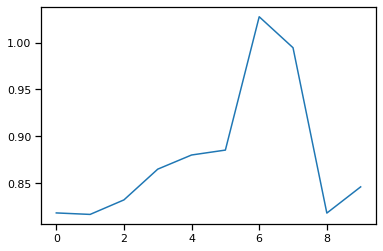

In [22]:
plt.plot(bonds30[bonds30.Sector == 'Corporate'].groupby('Rating scores')['L'].median());

In [80]:
bonds30[bonds30.Sector == 'Corporate'][['Liquidity','Rating']].nsmallest(columns = 'Liquidity', n = 10)

,Liquidity,Rating
"Альфа-Банк, С01-01",0.000000,BBB
"Газпром Капитал, 001Б-02",0.000000,AA+
"Западный скоростной диаметр, 01",2.948944,AAA
"ВЭБ.РФ, ПБО-001Р-29",4.586826,AAA
"РНКБ Банк, 01",7.054491,A+
"РЖД, БО-07",8.806260,AAA
"РусГидро, 07",9.585149,AAA
"ВЭБ.РФ, 18",9.893980,AAA
"МТС, БО-02",10.145478,AAA
"Банк ВТБ (ПАО), СУБ-Т1-5",10.211638,AAA


In [55]:
bonds30[(bonds30['Rating scores'] >=9) & (bonds30['Liquidity'] < 20)].Liquidity

ХМАО, 35002                            14.384004
РусГидро, 07                            9.585149
Банк ВТБ (ПАО), СУБ-Т1-5               10.211638
Газпром Капитал, 001Б-02                0.000000
АЛРОСА, БО-05                          18.517239
АЛРОСА, БО-06                          19.305524
Альфа-Банк, БО-22                      18.855404
Альфа-Банк, БО-39                      17.134255
Банк ВТБ (ПАО), БО-30                  19.147380
ВЭБ.РФ, 18                              9.893980
ВЭБ.РФ, 19                             15.233648
ВЭБ.РФ, ПБО-001Р-29                     4.586826
Газпром нефть, БО-03                   14.994230
Газпромбанк, БО-07                     12.286893
Газпромбанк, БО-09                     16.386875
Западный скоростной диаметр, 01         2.948944
МТС, БО-02                             10.145478
Металлоинвест, БО-10                   13.202847
Новая перевозочная компания, ПБО-02    17.734577
Почта России, БО-02                    10.482371
РЖД, 001P-03R       

In [60]:
bonds30.Liquidity.nsmallest(5)

Альфа-Банк, С01-01                 0.000000
Газпром Капитал, 001Б-02           0.000000
Западный скоростной диаметр, 01    2.948944
ВЭБ.РФ, ПБО-001Р-29                4.586826
РНКБ Банк, 01                      7.054491
Name: Liquidity, dtype: float64

In [20]:
bonds30.groupby('Industry')['L'].mean()

Industry
IT                  0.922483
agriculture         0.887554
bank                0.862709
black metallurgy    0.826088
color metallurgy    0.909952
communication       0.862695
construction        0.945656
energy              0.788660
financial           0.951971
food                0.942490
gov                 1.167773
leasing             0.810460
municipal           0.817043
oil                 0.855077
other               0.842172
retail              0.845181
transport           0.828510
wood                0.947580
Name: L, dtype: float64

In [28]:
bonds30.groupby('Rating scores')['Is liquid'].count()/(bonds30['Rating scores'].count())

Rating scores
0    0.107477
1    0.060748
2    0.025701
3    0.037383
4    0.074766
5    0.056075
6    0.077103
7    0.086449
8    0.060748
9    0.413551
Name: Is liquid, dtype: float64

In [33]:
bonds30.groupby('Rating scores')['Rating scores'].count()

Rating scores
0     46
1     26
2     11
3     16
4     32
5     24
6     33
7     37
8     26
9    177
Name: Rating scores, dtype: int64

In [34]:
bonds30.groupby(['Rating scores', 'Is liquid'])['Rating scores'].count()

Rating scores  Is liquid
0              0             33
               1             13
1              0             25
               1              1
2              0             11
3              0             14
               1              2
4              0             31
               1              1
5              0             23
               1              1
6              0             18
               1             15
7              0             27
               1             10
8              0             25
               1              1
9              0            162
               1             15
Name: Rating scores, dtype: int64

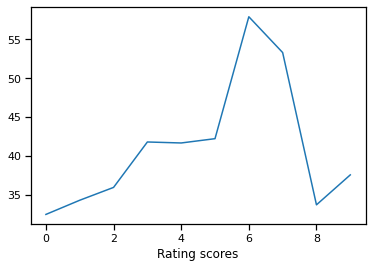

In [37]:
bonds30[bonds30['Sector'] == 'Corporate'].groupby('Rating scores')['Liquidity'].mean().plot();

In [39]:
bonds30[bonds30['Sector'] == 'Corporate'].corr()['L']

Age, days                          -0.106440
Coupon                             -0.013274
Days without trades, %             -0.603090
Average bid-ask                    -0.678692
Bid-Ask variance                   -0.268913
Last price volatility              -0.235223
Market price volatility             0.003269
Average turnover per day            0.516649
Turnover variance                   0.197046
Average trading quantity per day    0.776688
Trading quantity variance           0.351373
Average trading volume per day      0.569097
Volume variance                     0.197713
Average g-spread                    0.167873
G-spread variance                  -0.010077
Average accum coupon income        -0.148760
Accum coupon income variance       -0.162392
Average duration                   -0.164469
Duration variance                  -0.099318
Average last price return           0.186590
Last price return variance         -0.045985
Issued amount                       0.105507
Rating sco

In [122]:
bonds30[bonds30.Sector == 'Corporate'].groupby('Is liquid')['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Duration variance',
        'Average last price return',
       'Last price return variance', 'Issued amount',
        'Rating scores'].mean().round(decimals = 3)

C:\Users\arakh\AppData\Local\Temp/ipykernel_87388/4019869307.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bonds30[bonds30.Sector == 'Corporate'].groupby('Is liquid')['Age, days', 'Coupon', 'Days without trades, %',


,"Age, days",Coupon,"Days without trades, %",Last price volatility,Market price volatility,G-spread variance,Average duration,Duration variance,Average last price return,Last price return variance,Issued amount,Rating scores
Is liquid,,,,,,,,,,,,
0,461.348,9.42,10.486,1.622,0.978,13778.886,641.011,126.742,11.948,1.841,6.833272e+09,5.963
1,448.083,8.60,0.231,0.987,0.990,18655.104,545.753,129.438,12.531,1.827,1.234128e+10,6.917


In [23]:
bonds30[bonds30.Sector == 'Corporate'].groupby('Is liquid')['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Duration variance',
        'Average last price return',
       'Last price return variance', 'Issued amount',
        'Rating scores'].median().round(decimals = 3)

C:\Users\arakh\AppData\Local\Temp/ipykernel_77676/1704113407.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bonds30[bonds30.Sector == 'Corporate'].groupby('Is liquid')['Age, days', 'Coupon', 'Days without trades, %',


,"Age, days",Coupon,"Days without trades, %",Last price volatility,Market price volatility,G-spread variance,Average duration,Duration variance,Average last price return,Last price return variance,Issued amount,Rating scores
Is liquid,,,,,,,,,,,,
0,535.0,8.70,0.75,0.82,0.54,3331.70,575.555,135.075,9.805,0.40,5.000000e+09,8.0
1,463.0,8.25,0.00,0.47,0.50,1224.39,517.990,138.150,10.600,0.27,1.000000e+10,7.0


In [61]:
bonds30[(bonds30.Sector == 'Government')][['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Duration variance',
        'Average last price return',
       'Last price return variance', 'Issued amount',
        'Rating scores','L']].corr()['L']

Age, days                    -0.347172
Coupon                       -0.482218
Days without trades, %       -0.764345
Last price volatility        -0.733649
Market price volatility      -0.732271
G-spread variance            -0.736243
Average duration              0.153596
Duration variance            -0.376708
Average last price return     0.737807
Last price return variance   -0.737342
Issued amount                 0.383675
Rating scores                      NaN
L                             1.000000
Name: L, dtype: float64

In [63]:
xcor.head()

,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,Average trading quantity per day,Trading quantity variance,Average trading volume per day,Volume variance,Average g-spread,G-spread variance,Average accum coupon income,Accum coupon income variance,Average duration,Duration variance,Average last price return,Last price return variance,Offer - Put,Offer - Call,Issued amount,Rating scores,is_liquid
"Тинькофф Банк, 001P-03R",676.0,8.25,0.00,4.07,9.35,0.06,0.07,5763561.30,2.873647e+13,118.45,952.33,5797.79,2.904906e+07,365.15,4214.46,25.63,7.31,68.59,143.04,11.47,1.07,1,0,10000000000,6,1
"Сбербанк России, 002P-01",180.0,8.80,0.00,11.14,97.98,0.24,0.24,17696695.96,2.926438e+14,111.93,1286.21,17727.28,2.944854e+08,99.07,534.52,15.05,8.31,460.95,141.71,8.98,0.17,0,0,25000000000,9,1
"Московский кредитный банк, 001Р-03",257.0,8.35,0.00,14.90,269.95,1.05,1.02,1063595.32,1.791453e+12,45.76,421.33,1093.66,1.896072e+06,203.35,528.78,29.97,240.31,674.97,72.66,10.15,0.34,0,0,10000000000,7,0
"АФК Система, 001P-10",554.0,9.90,0.00,6.34,12.88,0.01,0.01,17063911.78,1.473031e+15,223.90,86644.31,17072.34,1.473604e+09,253.64,4125.15,28.32,10.52,77.59,143.04,10.34,0.31,1,0,10000000000,7,1
"Башнефть, 07",705.0,8.30,20.14,36.76,2232.55,0.13,0.04,1833246.66,8.321698e+13,4.00,7.36,1834.76,8.335022e+07,-83.14,226594.63,23.55,23.59,24.24,74.69,5.83,27.29,1,0,10000000000,9,0


In [351]:
x = bonds30.copy()
xcor = x[x.Sector == 'Corporate']
y = xcor.is_liquid
xcor.drop(['Sector', 'Rating', 'Industry', 'L', 'Liquidity', 'is_liquid'], axis = 1, inplace = True)

In [374]:
x = bonds30.copy()
xcor = x[x.Sector == 'Corporate']
#y = xcor.is_liquid
y = xcor.Liquidity.values
xcor = xcor[['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Average g-spread',
        'Duration variance',
        'Average accum coupon income',
        'Accum coupon income variance',
        'Average last price return',
        'Offer - Put',
        'Offer - Call',
       'Last price return variance', 'Issued amount',
        'Rating scores']]
#y = x.is_liquid


In [359]:
x = bonds30.copy()
xcor = x[x.Sector == 'Corporate']
y = xcor.L.values
xcor.drop(['Sector', 'Rating', 'Industry', 'L', 'Liquidity', 'is_liquid'], axis = 1, inplace = True)

In [355]:
xcor = x[(x.Sector == 'Corporate') & (x.Liquidity > 30)]
y = xcor.is_liquid
xcor = xcor[['Age, days', 'Coupon', 'Days without trades, %',
         'Last price volatility',
       'Market price volatility',  
         'G-spread variance',
       'Average duration',
        'Average g-spread',
        'Duration variance',
        'Average accum coupon income',
        'Accum coupon income variance',
        'Average last price return',
        'Offer - Put',
        'Offer - Call',
       'Last price return variance', 'Issued amount',
        'Rating scores']]

In [375]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xcor)
scaled_features = scaler.transform(xcor)
scaled_data = pd.DataFrame(scaled_features, columns = xcor.columns)
xcor = scaled_data
xcor['Market price volatility'] = xcor['Market price volatility'].fillna(xcor['Market price volatility'].mean())
xcor['Average g-spread'] = xcor['Average g-spread'].fillna(xcor['Average g-spread'].mean())
xcor['G-spread variance'] = xcor['G-spread variance'].fillna(xcor['G-spread variance'].mean())

xcor['Average accum coupon income'] = xcor['Average accum coupon income'].fillna(0)

xcor['Accum coupon income variance'] = xcor['Accum coupon income variance'].fillna(xcor['Accum coupon income variance'].mean())
xcor['Average duration'] = xcor['Average duration'].fillna(xcor['Average duration'].mean())
xcor['Duration variance'] = xcor['Duration variance'].fillna(xcor['Duration variance'].mean())
xcor['Average last price return'] = xcor['Average last price return'].fillna(xcor['Average last price return'].mean())
xcor['Last price return variance'] = xcor['Last price return variance'].fillna(xcor['Last price return variance'].mean())
#test = scaler.transform(test)
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(xcor, y, test_size = 0.2)

In [376]:
gbr_params = {'n_estimators': 30,
          'max_depth': 3,
          'min_samples_split': 7,
          'learning_rate': 0.1,
          'loss': 'ls'
             }
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_training_data, y_training_data)
preds = gbr.predict(x_test_data)
print("Model Accuracy: %.3f" % gbr.score(x_test_data, y_test_data))
mse = mean_squared_error(y_test_data, preds)
print('mse: %.3f' % mse)
print('log_loss: %.3f' % log_loss(y_test_data, preds))

Model Accuracy: 0.750
mse: 60.184


ValueError: Unknown label type: (array([55.02125815, 38.16954669, 31.25415632, 64.2200101 , 64.50395476,
       37.48897993,  7.05449058, 30.80045636, 31.67133412, 44.34822841,
       30.90589139, 63.08286994, 57.62574204, 37.8866776 , 63.09204999,
       43.2041526 , 38.85257679, 25.68352017, 20.67545164, 48.81773215,
       34.7650529 , 77.20080456, 21.02727768, 38.02263339, 34.54850759,
       29.18851226, 59.09343153, 64.94026461, 54.51067196, 51.32292347,
       38.84015273, 24.1051851 ,  9.09492595, 61.27336834, 46.17155574,
       47.54046777, 56.45665503, 23.10349306, 41.90623715, 26.18088936,
       19.13045585, 51.89368107, 17.13425459, 39.2626317 , 20.74927046,
       49.08537583, 12.65157028, 28.80854713, 34.85942676, 17.73457667,
       38.48701425, 48.95664008, 63.48905623, 54.64831062, 35.10959949,
       45.24560566, 18.42840489, 40.84400591, 46.72269375, 32.976991  ,
       63.52566872, 23.55306991, 48.20808861, 42.78646353, 37.27639732,
       50.88302182, 58.48150077, 23.7239839 , 16.5072151 , 27.98141017,
       29.97737655, 24.7556274 , 44.59388403, 18.51723884, 57.27781113,
       33.2206743 , 36.0519979 ]),)

In [354]:
gbr_params = {'n_estimators': 50,
          'max_depth': 3,
          'min_samples_split': 7,
          'learning_rate': 0.1,
          'loss': 'ls'
             }
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_training_data, y_training_data)
preds = gbr.predict(x_test_data)
print("Model Accuracy: %.3f" % gbr.score(x_test_data, y_test_data))
mse = mean_squared_error(y_test_data, preds)
print('mse: %.3f' % mse)
print('log_loss: %.3f' % log_loss(y_test_data, preds))

Model Accuracy: 0.427
mse: 0.114
log_loss: 0.775


In [123]:
x.head()

,Sector,"Age, days",Coupon,"Days without trades, %",Average bid-ask,Bid-Ask variance,Last price volatility,Market price volatility,Average turnover per day,Turnover variance,Average trading quantity per day,Trading quantity variance,Average trading volume per day,Volume variance,Average g-spread,G-spread variance,Average accum coupon income,Accum coupon income variance,Average duration,Duration variance,Average last price return,Last price return variance,Offer - Put,Offer - Call,Issued amount,Industry,Rating,Rating scores,L,Liquidity,is_liquid
"Россия, 46022 (ОФЗ-АД, SU46022RMFS8)",Government,2356.0,5.5,30.60,11.47,142.34,0.08,0.08,4.492219e+06,1.004914e+14,57.10,1609.52,5572.24,1.028080e+08,18.22,1370.35,16.55,147.76,248.72,6807.42,8.17,0.66,0,0,28222707000,gov,No,0,0.948753,50.767151,1
"Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)",Government,426.0,5.7,0.00,5.85,11.00,0.82,0.76,9.598632e+08,1.293612e+18,347.31,18376.72,1107937.41,1.726162e+12,11.14,32.95,7.87,3.49,1803.00,126.23,8.79,0.05,0,0,500000000000,gov,No,0,1.261803,90.806890,1
"Россия, 25084 (ОФЗ-ПД, SU25084RMFS3)",Government,618.0,5.3,0.00,6.31,15.36,0.41,0.40,1.297721e+08,8.180199e+16,397.69,26959.01,133483.76,8.645422e+10,7.47,25.47,14.44,3.02,432.36,141.80,8.06,0.28,0,0,151476252000,gov,No,0,1.195465,82.322107,1
"Россия, 26232 (ОФЗ-ПД, SU26232RMFS7)",Government,664.0,6.0,0.00,7.53,30.54,0.73,0.73,3.740930e+08,3.400273e+17,278.55,6919.54,417451.97,4.221998e+11,10.79,40.72,15.19,3.87,1623.38,125.93,8.73,0.05,0,0,45000000000,gov,No,0,1.206611,83.747787,1
"Россия, 46011 (ОФЗ-АД, SU46011RMFS1)",Government,2356.0,10.0,61.88,1350.67,856061.87,723.73,169.03,2.121873e+04,1.213823e+09,6.00,22.29,14.90,3.941700e+02,-2352.61,276197.27,70.88,6.87,713.99,572.44,-15.44,36.19,0,0,15437600,gov,No,0,0.678374,16.185108,0


In [133]:
xcor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age, days                     382 non-null    float64
 1   Coupon                        382 non-null    float64
 2   Days without trades, %        382 non-null    float64
 3   Last price volatility         382 non-null    float64
 4   Market price volatility       382 non-null    float64
 5   G-spread variance             382 non-null    float64
 6   Average duration              382 non-null    float64
 7   Average g-spread              382 non-null    float64
 8   Duration variance             382 non-null    float64
 9   Average accum coupon income   382 non-null    float64
 10  Accum coupon income variance  382 non-null    float64
 11  Average last price return     382 non-null    float64
 12  Offer - Put                   382 non-null    float64
 13  Offer

In [335]:
gbr_params = {'n_estimators': 50,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.1,
             }
gbr = GradientBoostingClassifier(**gbr_params)
gbr.fit(x_training_data, y_training_data)
preds = gbr.predict(x_test_data)
print("Model Accuracy: %.3f" % gbr.score(x_test_data, y_test_data))
mse = mean_squared_error(y_test_data, preds)
print('mse: %.3f' % mse)

Model Accuracy: 0.961
mse: 0.039


In [170]:
print(gbr.coef_)

AttributeError: 'GradientBoostingClassifier' object has no attribute 'coef_'

In [377]:
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(gbr, random_state = 1).fit(x_test_data, y_test_data)
eli5.show_weights(perm, feature_names = x_test_data.columns.to_list())

Weight,Feature
0.9002 ± 0.3761,"Days without trades, %"
0.1365 ± 0.0212,Issued amount
0.1074 ± 0.0352,G-spread variance
0.0336 ± 0.0151,Average g-spread
0.0323 ± 0.0132,Last price volatility
0.0175 ± 0.0124,Rating scores
0.0047 ± 0.0102,Duration variance
0.0033 ± 0.0067,"Age, days"
0.0019 ± 0.0107,Market price volatility
0.0003 ± 0.0020,Offer - Call


In [357]:
from sklearn.linear_model import LinearRegression
mod = LinearRegression()
mod.fit(x_training_data, y_training_data)
preds = mod.predict(x_test_data)

In [358]:
perm = PermutationImportance(mod).fit(x_test_data, y_test_data)
eli5.show_weights(mod, feature_names = x_test_data.columns.to_list())

Weight?,Feature
+0.528,Average g-spread
+0.408,<BIAS>
+0.365,Last price return variance
+0.201,Issued amount
+0.064,Rating scores
+0.062,Duration variance
+0.055,Accum coupon income variance
+0.038,Last price volatility
+0.029,Offer - Put
-0.020,Average accum coupon income


In [280]:
bonds30.Sector.value_counts()

Corporate     382
Municipal      27
Government     16
Name: Sector, dtype: int64

In [287]:
bonds30.Rating.value_counts() / 425 *100

AAA     29.647059
AA+     11.294118
No      10.352941
AA       6.117647
BBB+     5.647059
A-       5.411765
BBB-     4.941176
AA-      4.470588
A+       4.235294
BB+      3.764706
BB       2.588235
BBB      2.588235
A        2.352941
BB-      2.352941
B-       2.352941
B+       0.941176
C        0.470588
B        0.470588
Name: Rating, dtype: float64

In [285]:
bonds30.shape

(425, 31)

In [290]:
bonds30.groupby('Sector').Liquidity.nlargest(5)

Sector                                          
Corporate   Группа компаний Самолет, БО-П08          77.200805
            МаксимаТелеком, БО-П01                   76.509343
            Группа компаний Самолет, БО-П10          74.769800
            Полюс, ПБО-01                            74.600749
            Группа компаний Самолет, БО-П11          74.535955
Government  Россия, 26215 (ОФЗ-ПД, SU26215RMFS2)    100.000000
            Россия, 26207 (ОФЗ-ПД, SU26207RMFS9)     95.470005
            Россия, 26227 (ОФЗ-ПД, SU26227RMFS7)     93.924183
            Россия, 26234 (ОФЗ-ПД, SU26234RMFS3)     91.872088
            Россия, 26236 (ОФЗ-ПД, SU26236RMFS8)     90.806890
Municipal   Москва, 72                               58.745675
            Москва, 48                               49.377687
            Республика Карелия, 35018                48.246089
            Московская область, 34011                45.951879
            Оренбургская область, 35003              45.337670
Name: 

In [292]:
bonds30.groupby('Sector')[['Liquidity', 'Issued amount']].nlargest(5, columns = 'Liquidity')

AttributeError: 'DataFrameGroupBy' object has no attribute 'nlargest'

In [293]:
bonds30.groupby('Sector')[['Liquidity', 'Issued amount']]

In [305]:
bonds30.groupby('Sector').Liquidity.mean()

Sector
Corporate     40.337681
Government    78.725168
Municipal     33.882616
Name: Liquidity, dtype: float64

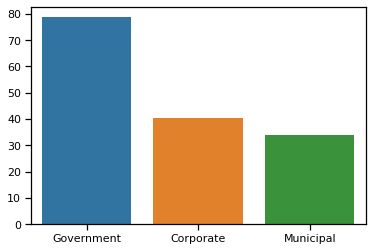

In [308]:
sns.barplot(x = ['Government', 'Corporate', 'Municipal'], y = [78.725168, 40.337681, 33.882616]);

In [304]:
bonds30.Sector.unique()

array(['Government', 'Corporate', 'Municipal'], dtype=object)

In [336]:
df7.head()

,stock market name,bid,ask,bid-Ask spread,avg price,opening price,min price,max price,last price,avg weight price,market price,pension market price,admitted quote,closing price,ind price,ind price type,turnover,quantity,volume,coupon,maturity date,ind price return,bid price return,ask price return,last price return,closing price return,accum coupon income,duration,modified duration,offer date,offer ind price return,offer bid price return,offer ask price return,offer last price return,offer closing price return,offer duration,modified offer duraton,g-spread,g-spread2,g-spread benchmark
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-08-03,Московская биржа Т+,99.76,99.8,4.0,99.78,99.89,99.72,99.89,99.74,99.79,99.79,99.79,99.74,99.74,99.79,Avg,1273321.8,90,1276,8.25,2029-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,30.06,NaN,NaN,2022-09-26 00:00:00,9.954898,10.194226,9.875254,10.354105,10.354105,49.0,0.122092,224.84991,NaN,NaN
2022-08-02,Московская биржа Т+,99.81,99.84,3.0,99.825,99.72,99.72,99.87,99.81,99.79,99.85,99.85,99.81,99.81,99.79,Avg,15203991.6,60,15227,8.25,2029-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,29.84,NaN,NaN,2022-09-26 00:00:00,9.918013,9.76199,9.528428,9.76199,9.76199,50.0,0.124626,227.222217,NaN,NaN
2022-08-01,Московская биржа Т+,99.74,99.79,5.0,99.765,99.77,99.67,99.88,99.79,99.79,99.79,99.79,99.79,99.79,99.79,Avg,15977452.2,90,16011,8.25,2029-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,29.61,NaN,NaN,2022-09-26 00:00:00,9.890275,10.273743,9.890275,9.890275,9.890275,51.0,0.12715,244.089346,NaN,NaN
2022-07-29,Московская биржа Т+,99.76,99.77,1.0,99.765,99.74,99.65,99.86,99.78,99.75,99.75,99.75,99.78,99.78,99.75,Avg,2613410.2,160,2620,8.25,2029-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,28.93,NaN,NaN,2022-09-26 00:00:00,10.095822,10.023349,9.950931,9.878567,9.878567,54.0,0.134379,292.415471,NaN,NaN
2022-07-28,Московская биржа Т+,99.68,99.72,4.0,99.7,99.56,99.56,99.76,99.72,99.7,99.7,99.7,99.72,99.72,99.7,Avg,6833272.7,89,6854,8.25,2029-09-12 00:00:00,NaN,NaN,NaN,NaN,NaN,28.71,NaN,NaN,2022-09-26 00:00:00,10.416451,10.559436,10.273678,10.273678,10.273678,55.0,0.13647,337.624214,NaN,NaN
